<a href="https://colab.research.google.com/github/Dynamo-Dream/Stock_Price_Prediction/blob/main/Airtel_STOCK_PRice_PRediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Price Prediction of AIRTEL Stock

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/airtel.csv")

In [ ]:
df = df[::-1] ## Only To reverse Dataset
df = df.reset_index(drop=True)

In [ ]:
df.head()

Date  series    OPEN    HIGH     LOW  PREV. CLOSE     ltp   close   \
0  23-Dec-2022      EQ  814.00  817.95  805.00       816.60  809.95  808.65   
1  26-Dec-2022      EQ  805.05  815.20  801.15       808.65  809.25  811.00   
2  27-Dec-2022      EQ  815.00  819.45  805.00       811.00  814.95  814.80   
3  28-Dec-2022      EQ  813.00  813.90  801.45       814.80  803.30  803.80   
4  29-Dec-2022      EQ  807.05  824.75  760.10       803.80  823.00  820.75   

    vwap   52W H   52W L     VOLUME              VALUE  No of trades   
0  810.81  860.55  628.75  28,04,496  2,27,39,13,792.35        95,664  
1  808.71  860.55  628.75  60,23,206  4,87,10,44,496.85      1,01,992  
2  812.35  860.55  628.75  17,82,053  1,44,76,52,815.05        72,357  
3  806.55  860.55  628.75  29,07,741  2,34,52,25,830.60        86,146  
4  814.12  860.55  628.75  61,10,313  4,97,45,35,535.65      1,24,608

In [ ]:
df.isna().sum()

Date             0
series           0
OPEN             0
HIGH             0
LOW              0
PREV. CLOSE      0
ltp              0
close            0
vwap             0
52W H            0
52W L            0
VOLUME           0
VALUE            0
No of trades     0
dtype: int64

In [ ]:
df.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [ ]:
target = 'close '
if(df[target].dtype == 'O'):
  df[target] = df[target].str.replace(',', '').astype(float)


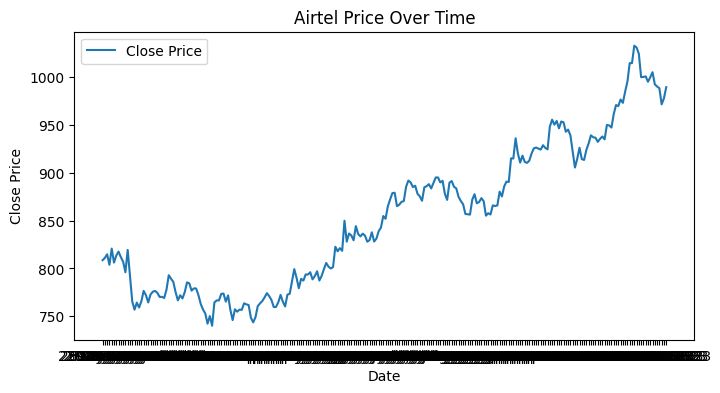

In [ ]:
stock_name = "Airtel"
plt.figure(figsize=(8, 4))
plt.plot(df["Date "],df[target], label='Close Price')
plt.title( stock_name +' Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

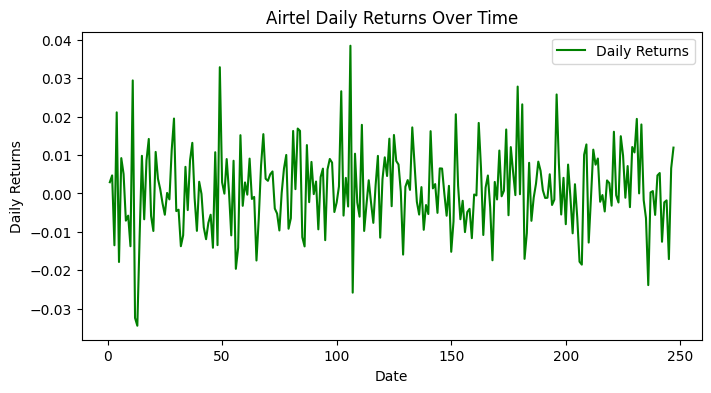

In [ ]:
daily_returns = df[target].pct_change()
plt.figure(figsize=(8, 4))
plt.plot(daily_returns, label='Daily Returns', color='green')
plt.title(stock_name+ ' Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.show()

In [ ]:
print("Summary Statistics:")
print(df[target].describe())

Summary Statistics:
count     248.000000
mean      852.978024
std        76.395549
min       740.100000
25%       777.512500
50%       853.375000
75%       914.450000
max      1032.900000
Name: close , dtype: float64


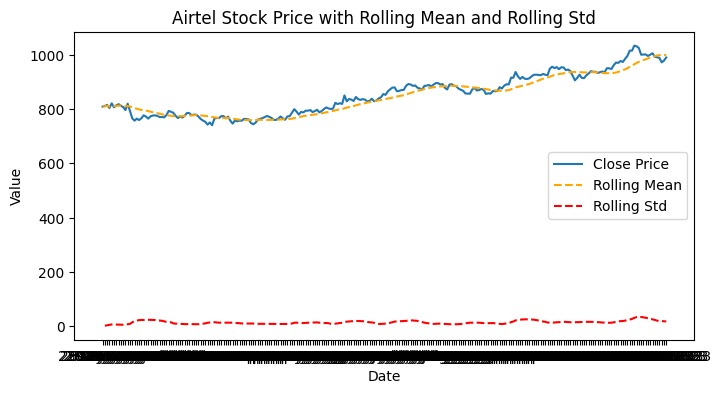

In [ ]:
window = 20
df['Rolling Mean'] = df[target].rolling(window=window,min_periods=1).mean()
df['Rolling Std'] = df[target].rolling(window=window,min_periods=1).std()

plt.figure(figsize=(8, 4))
plt.plot(df[target], label='Close Price')
plt.plot(df['Rolling Mean'],  linestyle='--', color='orange',label="Rolling Mean")
plt.plot(df['Rolling Std'], linestyle='--', color='red',label = "Rolling Std")
plt.title(stock_name + ' Stock Price with Rolling Mean and Rolling Std')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

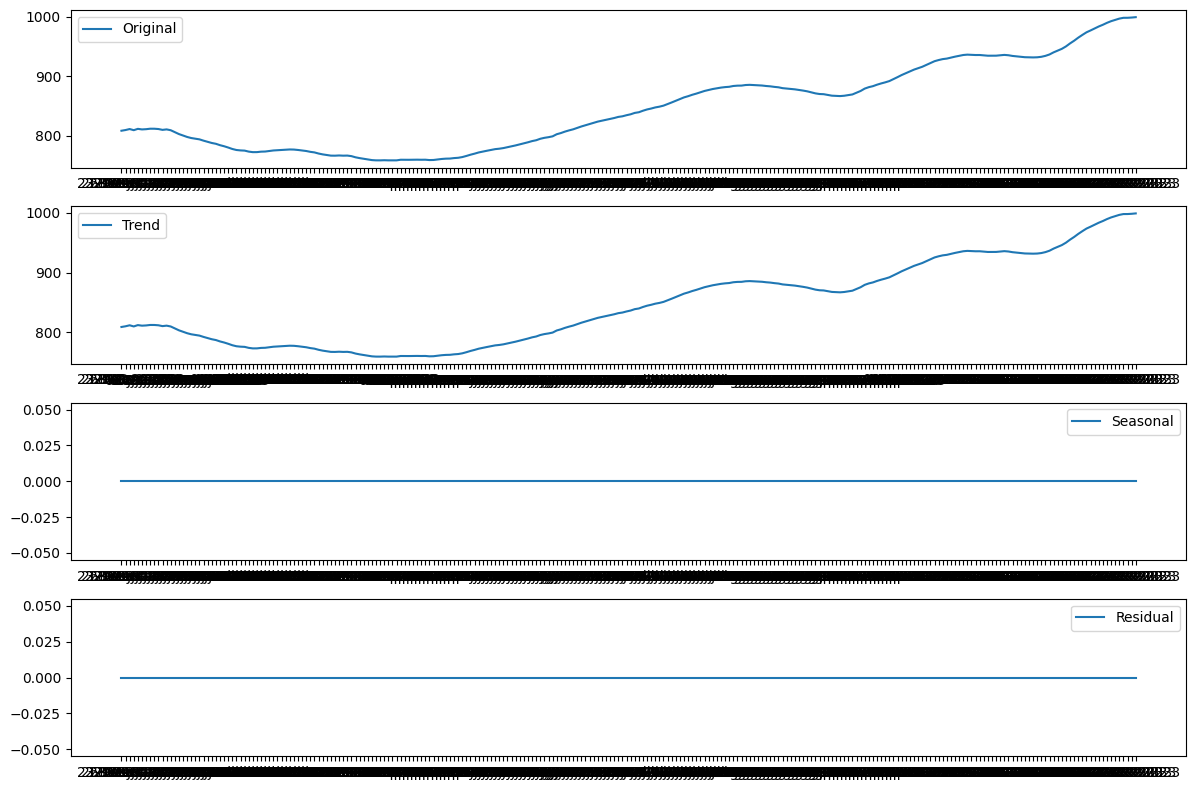

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["Rolling Mean"], model='additive', period=1)
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df.index,df["Rolling Mean"], label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()

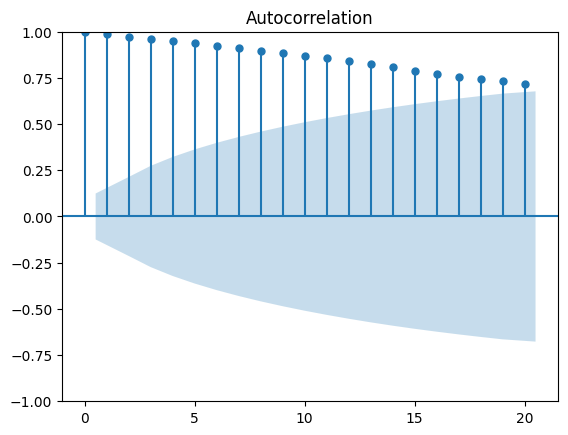

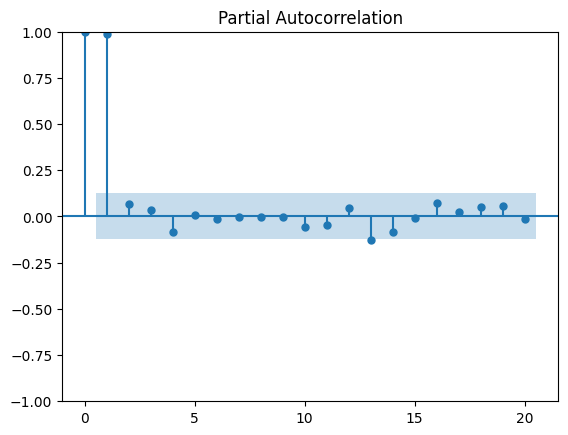

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
lag = 20
acf = plot_acf(df[target],lags = lag)
pacf = plot_pacf(df[target],lags = lag)

In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df[target],autolag='AIC')
print("ADF: ", dftest[0])
print("P-Value: ", dftest[1])
print("Num Of Lags: ", dftest[2])
print("Num of observation used for ADF Regression and Critical Values Calculation: ", dftest[3])
print("Critical Value")
for key,val in dftest[4].items():
    print("\t",key,": ",val)

ADF:  -0.15536855235790284
P-Value:  0.9436366650804409
Num Of Lags:  0
Num of observation used for ADF Regression and Critical Values Calculation:  247
Critical Value
	 1% :  -3.457105309726321
	 5% :  -2.873313676101283
	 10% :  -2.5730443824681606


In [ ]:
df.set_index("Date ", inplace=True)
data = df[target]

KeyError: ignored

In [ ]:
data = pd.DataFrame(data,columns=['close '])
data.head()

close 
Date               
23-Dec-2022  808.65
26-Dec-2022  811.00
27-Dec-2022  814.80
28-Dec-2022  803.80
29-Dec-2022  820.75

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
length = data.size
timestamp = 20
percent_data = 0.85

In [ ]:
data

close 
Date               
23-Dec-2022  808.65
26-Dec-2022  811.00
27-Dec-2022  814.80
28-Dec-2022  803.80
29-Dec-2022  820.75
...             ...
18-Dec-2023  990.25
19-Dec-2023  988.45
20-Dec-2023  971.55
21-Dec-2023  977.90
22-Dec-2023  989.55

[248 rows x 1 columns]

In [ ]:
from math import ceil
train = data.iloc[:ceil(length*percent_data),0]
test = data.iloc[ceil(length*percent_data)-timestamp:,0]

In [ ]:
train = pd.DataFrame(train,columns=['close '])
test = pd.DataFrame(test,columns=['close '])

In [ ]:
train.head()

close 
Date               
23-Dec-2022  808.65
26-Dec-2022  811.00
27-Dec-2022  814.80
28-Dec-2022  803.80
29-Dec-2022  820.75

In [ ]:
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train

array([[0.31809745],
       [0.32900232],
       [0.34663573],
       [0.29559165],
       [0.37424594],
       [0.3062645 ],
       [0.34060325],
       [0.35962877],
       [0.33271462],
       [0.31090487],
       [0.25939675],
       [0.36798144],
       [0.24477958],
       [0.11809745],
       [0.07795824],
       [0.11229698],
       [0.08839907],
       [0.1187935 ],
       [0.16914153],
       [0.14802784],
       [0.11299304],
       [0.1512761 ],
       [0.1649652 ],
       [0.16890951],
       [0.15962877],
       [0.13967517],
       [0.14013921],
       [0.13457077],
       [0.17470998],
       [0.2450116 ],
       [0.22807425],
       [0.212529  ],
       [0.16241299],
       [0.12320186],
       [0.14779582],
       [0.13225058],
       [0.16287703],
       [0.21020882],
       [0.20580046],
       [0.17030162],
       [0.1812065 ],
       [0.18074246],
       [0.1487239 ],
       [0.10603248],
       [0.07888631],
       [0.05939675],
       [0.0099768 ],
       [0.046

In [ ]:
train_length = scaled_train.size
val_percent = 0.10
train_data = scaled_train[:ceil(train_length*(1-val_percent))]
val_data = scaled_train[ceil(train_length*(1-val_percent))-timestamp:]
train_length

211

In [ ]:
def GenerateTimeSeries(dataset, timestamp, dataset_length):
  X = []
  Y = []
  for i in range(timestamp, dataset_length):
    X.append(dataset[i-timestamp:i,0])
    Y.append(dataset[i,0])
  X,Y = np.array(X),np.array(Y)

  return X,Y


In [ ]:
train_data.shape[0]

190

In [ ]:
timestamp = 20
X_train,Y_train = GenerateTimeSeries(train_data,timestamp, train_data.shape[0])

X_test,Y_test = GenerateTimeSeries(scaled_test, timestamp, scaled_test.shape[0])

In [ ]:
X_val, Y_val = GenerateTimeSeries(val_data, timestamp, val_data.shape[0])

In [ ]:
X_train,Y_train

(array([[0.31809745, 0.32900232, 0.34663573, ..., 0.1187935 , 0.16914153,
         0.14802784],
        [0.32900232, 0.34663573, 0.29559165, ..., 0.16914153, 0.14802784,
         0.11299304],
        [0.34663573, 0.29559165, 0.37424594, ..., 0.14802784, 0.11299304,
         0.1512761 ],
        ...,
        [0.60440835, 0.53410673, 0.54593968, ..., 0.82529002, 0.79489559,
         0.79025522],
        [0.53410673, 0.54593968, 0.53967517, ..., 0.79489559, 0.79025522,
         0.80092807],
        [0.54593968, 0.53967517, 0.58399072, ..., 0.79025522, 0.80092807,
         0.83596288]]),
 array([0.11299304, 0.1512761 , 0.1649652 , 0.16890951, 0.15962877,
        0.13967517, 0.14013921, 0.13457077, 0.17470998, 0.2450116 ,
        0.22807425, 0.212529  , 0.16241299, 0.12320186, 0.14779582,
        0.13225058, 0.16287703, 0.21020882, 0.20580046, 0.17030162,
        0.1812065 , 0.18074246, 0.1487239 , 0.10603248, 0.07888631,
        0.05939675, 0.0099768 , 0.04686775, 0.        , 0.11276102,
 

In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense,LSTM,Dropout,GRU, Input

In [ ]:
def lstm_model(input_shape):
  regressor = Sequential()
  regressor.add(LSTM(units=100,return_sequences=True, input_shape = input_shape))
  regressor.add(Dropout(0.2))
  regressor.add(LSTM(units=100, return_sequences=True))
  regressor.add(Dropout(0.2))
  regressor.add(LSTM(units=100, return_sequences=True))
  regressor.add(Dropout(0.2))
  regressor.add(LSTM(units=100, return_sequences=True))
  regressor.add(Dropout(0.2))
  regressor.add(LSTM(units=100))
  regressor.add(Dropout(0.2))
  regressor.add(Dense(units=1))

  noise = Input(shape = input_shape)
  output = regressor(noise)

  regressor.summary()
  return Model(noise,output)

def gru_model(input_shape):
  regressor = Sequential()
  regressor.add(GRU(units=100, return_sequences=True, input_shape = input_shape))
  regressor.add(Dropout(0.2))
  regressor.add(GRU(units=100, return_sequences=True))
  regressor.add(Dropout(0.2))
  regressor.add(GRU(units=100, return_sequences=True))
  regressor.add(Dropout(0.2))
  regressor.add(GRU(units=100, return_sequences=True))
  regressor.add(Dropout(0.2))
  regressor.add(GRU(units=100))
  regressor.add(Dropout(0.2))
  regressor.add(Dense(units=1))

  noise = Input(shape = input_shape)
  output = regressor(noise)
  regressor.summary()
  return Model(noise,output)

In [ ]:
feature = 1
input_shape = (timestamp,feature)
lstm = lstm_model(input_shape)
gru = gru_model(input_shape)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 20, 100)           40800     
                                                                 
 dropout_30 (Dropout)        (None, 20, 100)           0         
                                                                 
 lstm_16 (LSTM)              (None, 20, 100)           80400     
                                                                 
 dropout_31 (Dropout)        (None, 20, 100)           0         
                                                                 
 lstm_17 (LSTM)              (None, 20, 100)           80400     
                                                                 
 dropout_32 (Dropout)        (None, 20, 100)           0         
                                                                 
 lstm_18 (LSTM)              (None, 20, 100)          

In [ ]:
lstm.compile(optimizer='adam', loss='mse')
gru.compile(optimizer='adam', loss='mse')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=6,
    verbose=1,
    mode='min'
)

In [ ]:
lstm.fit(X_train, Y_train, validation_data= (X_val,Y_val), epochs=150, batch_size=32)

Epoch 1/150
6/6 [==============================] - 12s 477ms/step - loss: 0.1131 - val_loss: 0.0276
Epoch 2/150
6/6 [==============================] - 1s 89ms/step - loss: 0.0248 - val_loss: 0.0325
Epoch 3/150
6/6 [==============================] - 1s 86ms/step - loss: 0.0188 - val_loss: 0.0189
Epoch 4/150
6/6 [==============================] - 1s 90ms/step - loss: 0.0141 - val_loss: 0.0093
Epoch 5/150
6/6 [==============================] - 1s 146ms/step - loss: 0.0111 - val_loss: 0.0100
Epoch 6/150
6/6 [==============================] - 1s 133ms/step - loss: 0.0123 - val_loss: 0.0127
Epoch 7/150
6/6 [==============================] - 1s 141ms/step - loss: 0.0112 - val_loss: 0.0090
Epoch 8/150
6/6 [==============================] - 1s 136ms/step - loss: 0.0113 - val_loss: 0.0166
Epoch 9/150
6/6 [==============================] - 1s 83ms/step - loss: 0.0107 - val_loss: 0.0167
Epoch 10/150
6/6 [==============================] - 0s 80ms/step - loss: 0.0115 - val_loss: 0.0082
Epoch 11/150


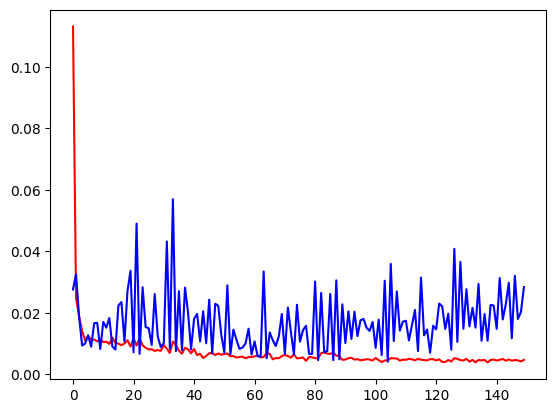

In [ ]:
plt.plot(lstm.history.history['loss'],color='red',label='train')
plt.plot(lstm.history.history['val_loss'],color='blue',label='train')

In [ ]:
gru.fit(X_train, Y_train, validation_data= (X_val,Y_val), epochs=150, batch_size=32)

Epoch 1/150
6/6 [==============================] - 14s 436ms/step - loss: 0.0940 - val_loss: 0.0425
Epoch 2/150
6/6 [==============================] - 0s 74ms/step - loss: 0.0291 - val_loss: 0.0074
Epoch 3/150
6/6 [==============================] - 0s 75ms/step - loss: 0.0159 - val_loss: 0.0216
Epoch 4/150
6/6 [==============================] - 1s 86ms/step - loss: 0.0101 - val_loss: 0.0147
Epoch 5/150
6/6 [==============================] - 0s 80ms/step - loss: 0.0075 - val_loss: 0.0079
Epoch 6/150
6/6 [==============================] - 1s 87ms/step - loss: 0.0061 - val_loss: 0.0086
Epoch 7/150
6/6 [==============================] - 0s 84ms/step - loss: 0.0058 - val_loss: 0.0092
Epoch 8/150
6/6 [==============================] - 0s 74ms/step - loss: 0.0064 - val_loss: 0.0073
Epoch 9/150
6/6 [==============================] - 0s 72ms/step - loss: 0.0059 - val_loss: 0.0074
Epoch 10/150
6/6 [==============================] - 1s 85ms/step - loss: 0.0064 - val_loss: 0.0108
Epoch 11/150
6/6 

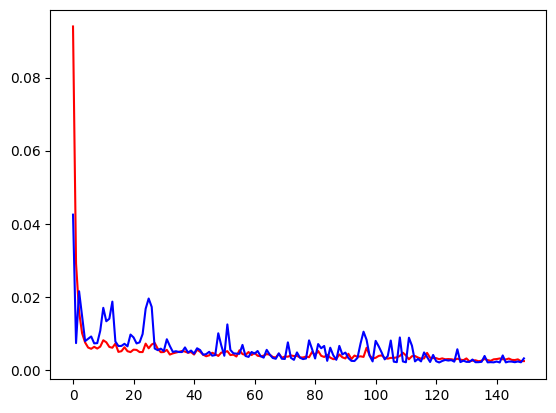

In [ ]:
plt.plot(gru.history.history['loss'],color='red',label='train')
plt.plot(gru.history.history['val_loss'],color='blue',label='train')

In [ ]:
gru_pred = gru.predict(X_test)

2/2 [==============================] - 2s 15ms/step


In [ ]:
lstm_pred = lstm.predict(X_test)

2/2 [==============================] - 2s 15ms/step


In [ ]:
gru_pred[0],lstm_pred[0],Y_test[0]

(array([0.80510783], dtype=float32),
 array([0.63659245], dtype=float32),
 0.8044083526682133)

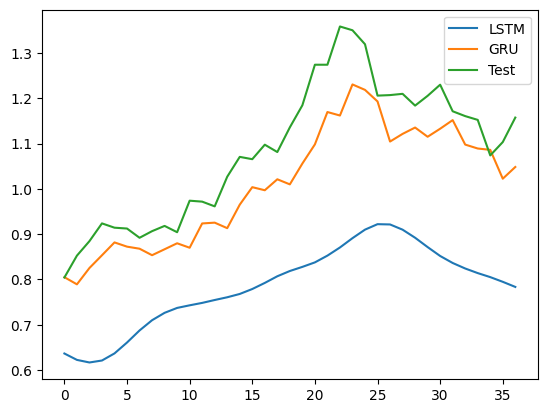

In [ ]:
plt.plot(lstm_pred, label='LSTM')
plt.plot(gru_pred, label='GRU')
plt.plot(Y_test,label="Test")
plt.legend()
plt.show()

In [ ]:
lstm_pred = np.array(lstm_pred)
gru_pred = np.array(gru_pred)

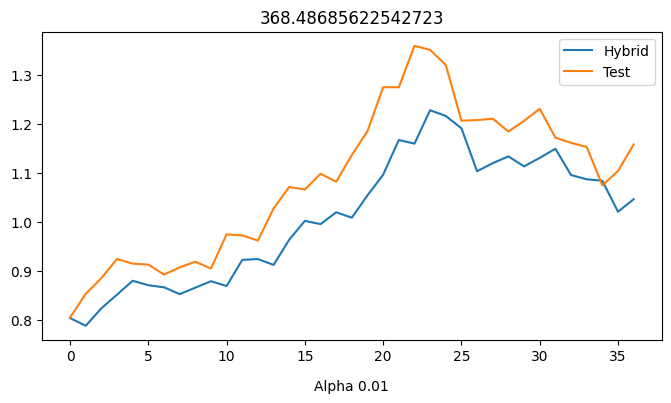

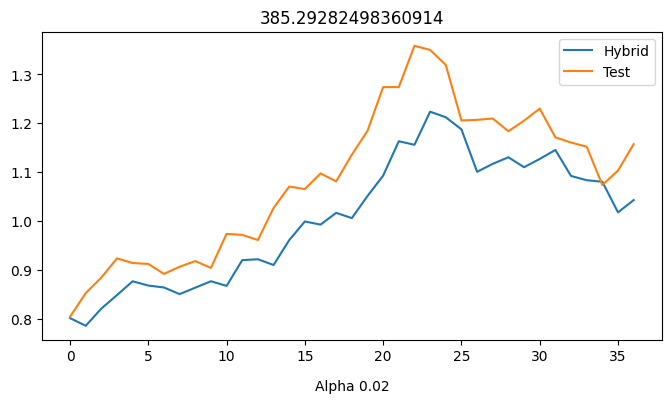

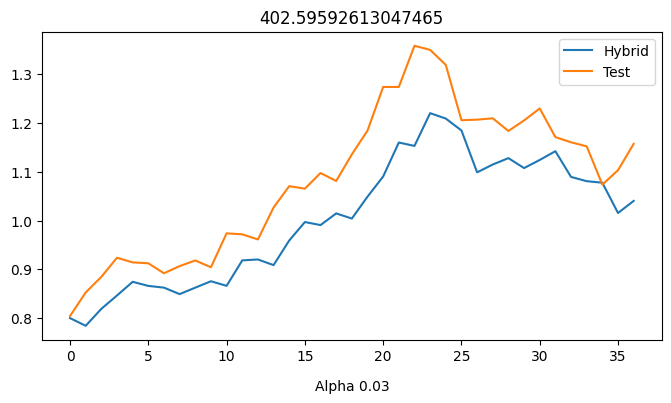

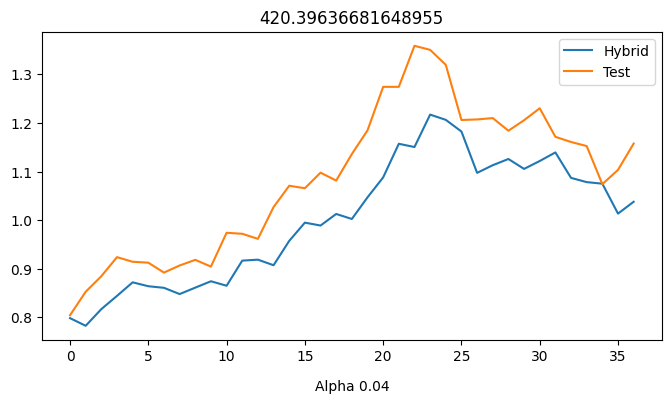

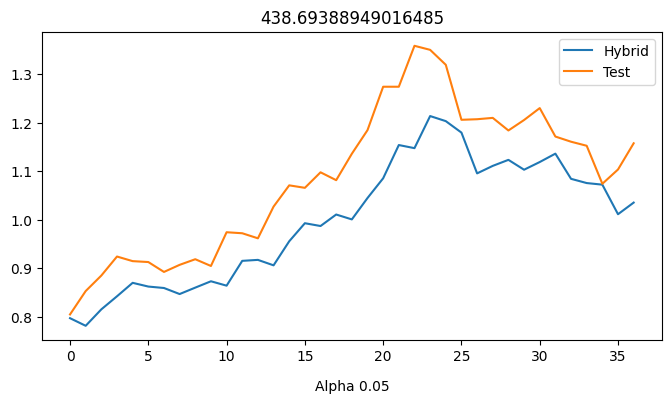

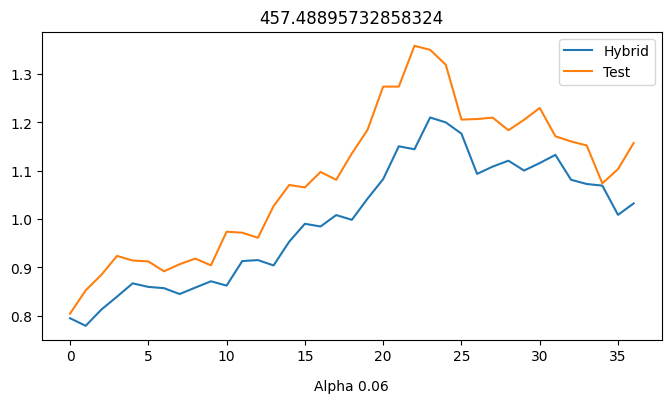

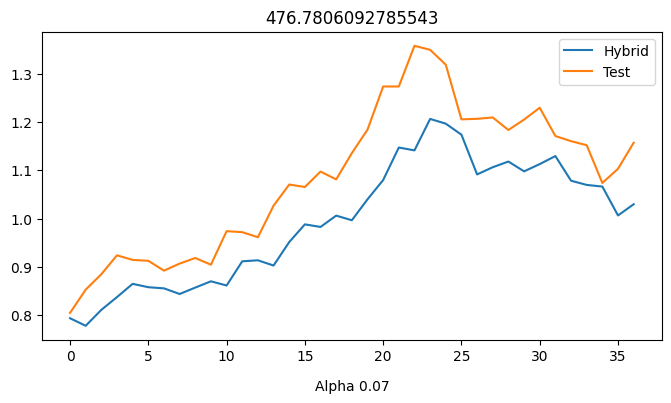

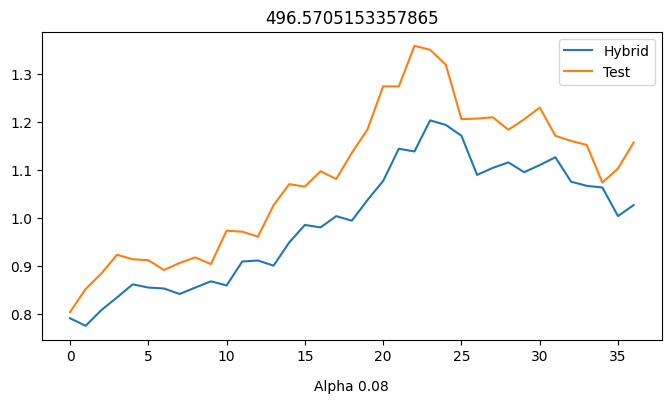

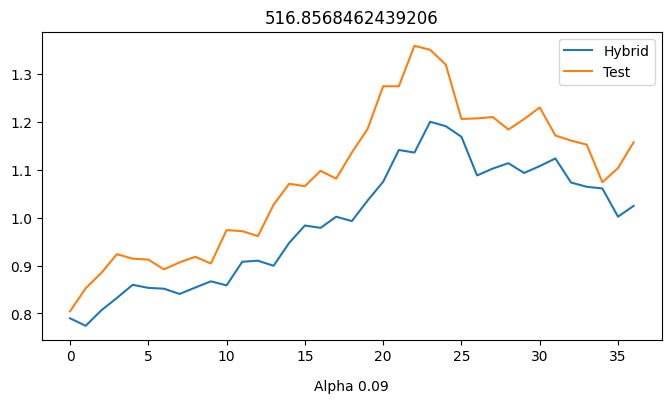

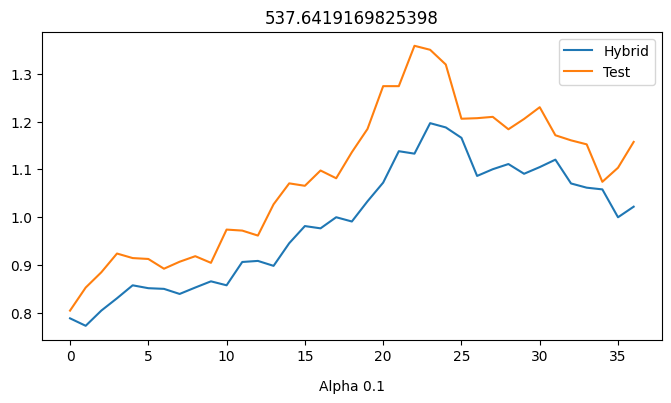

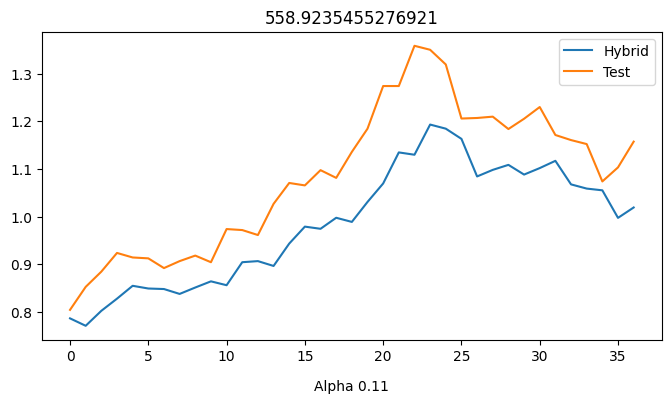

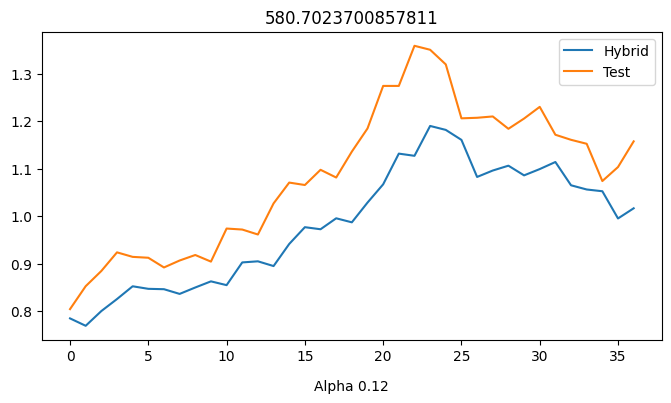

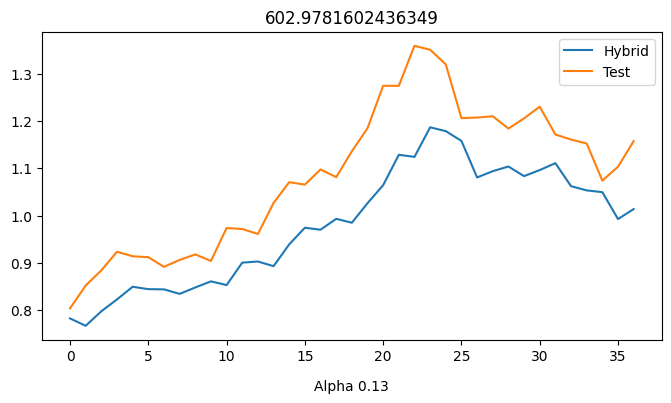

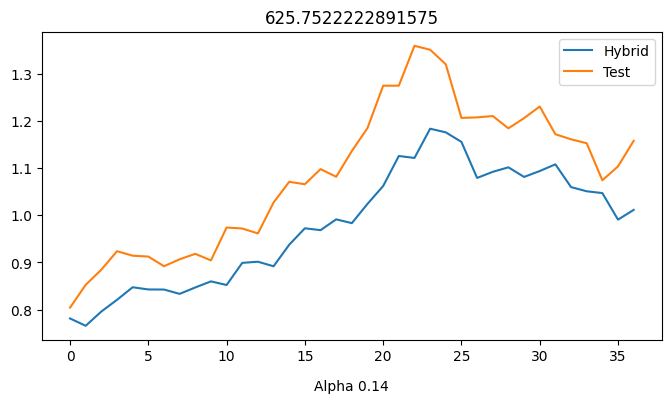

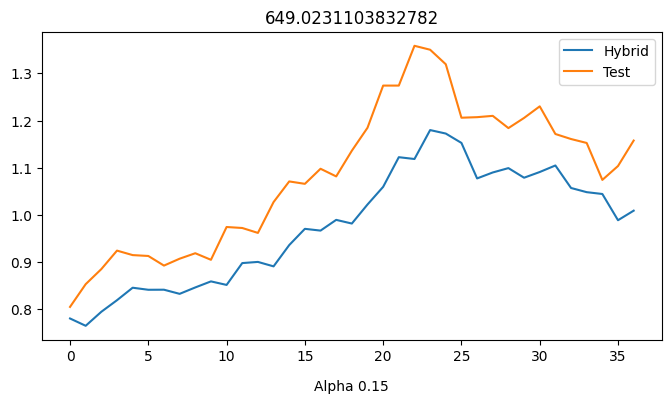

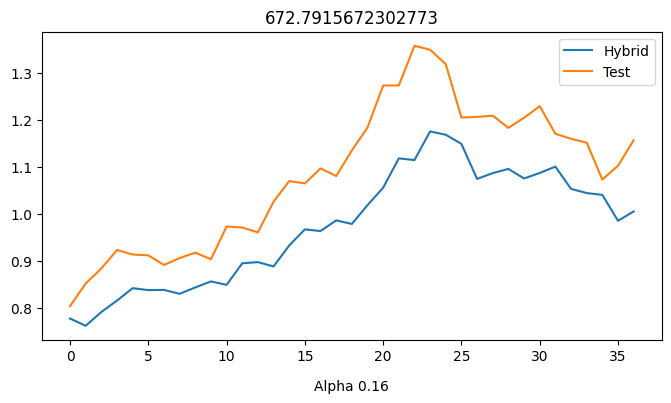

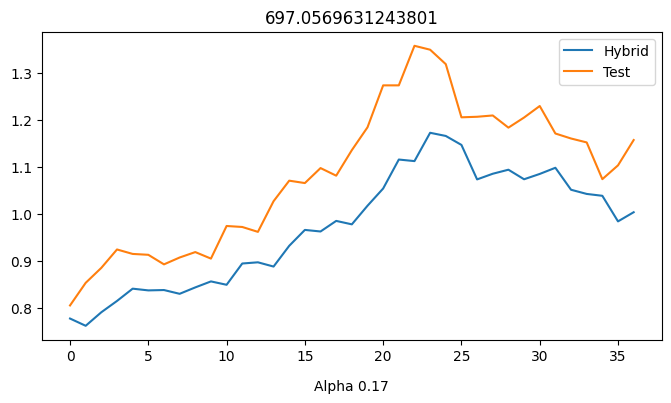

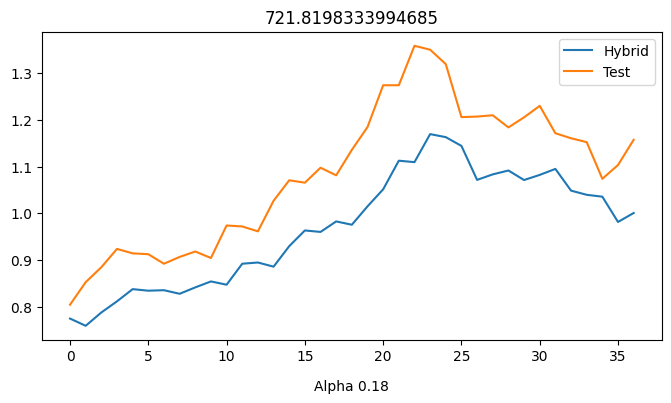

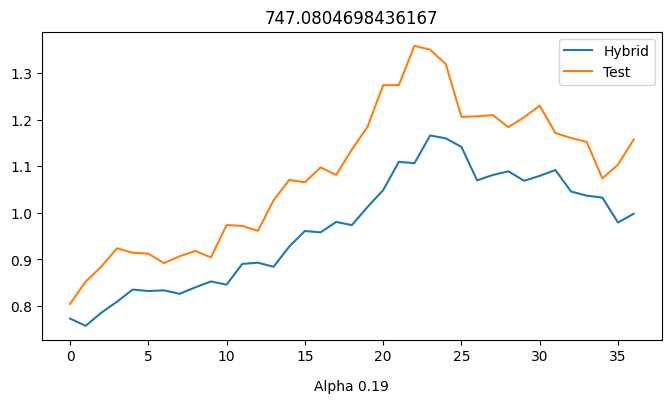

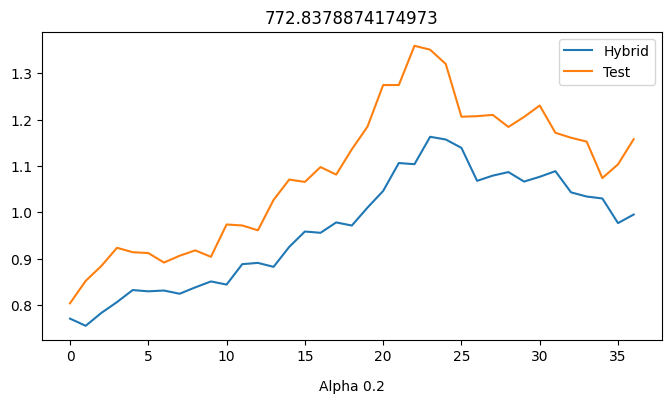

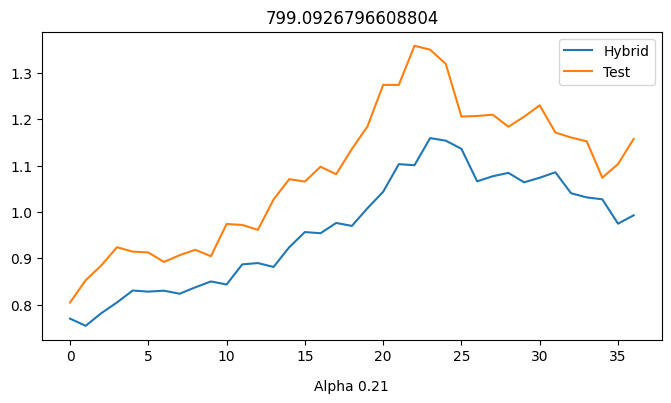

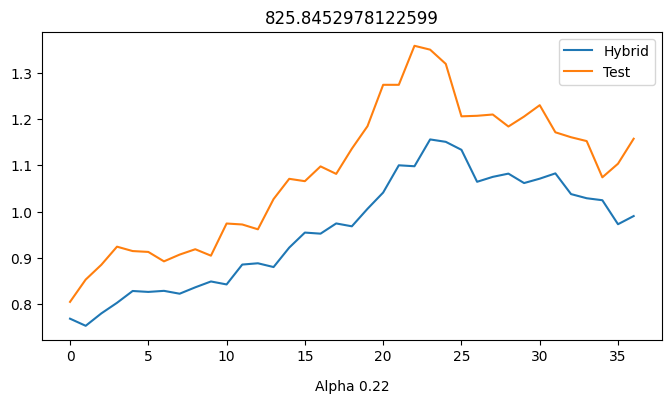

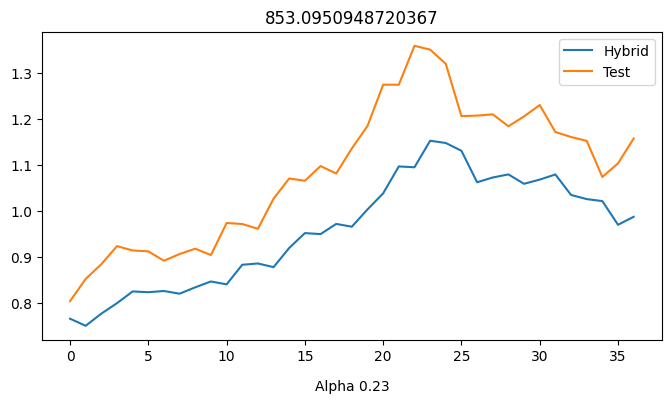

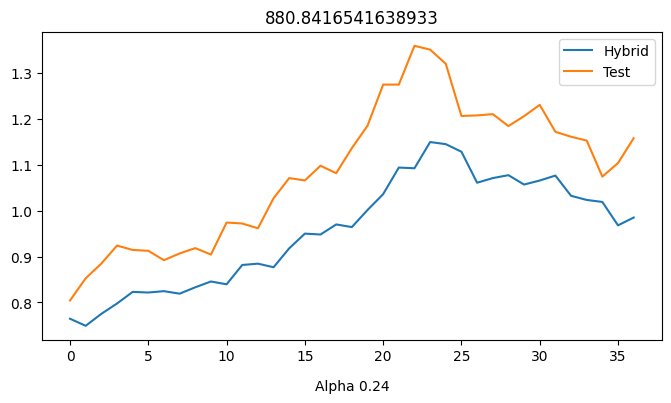

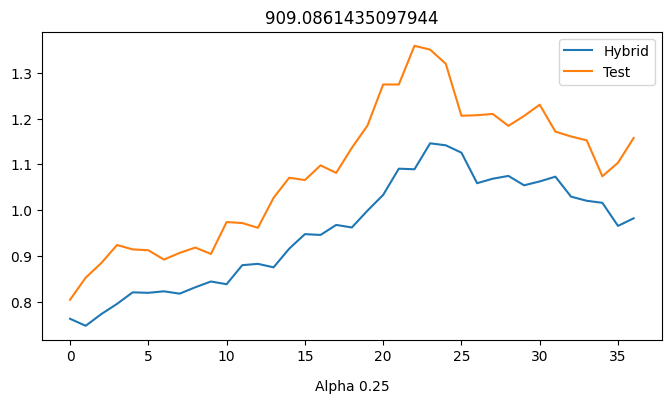

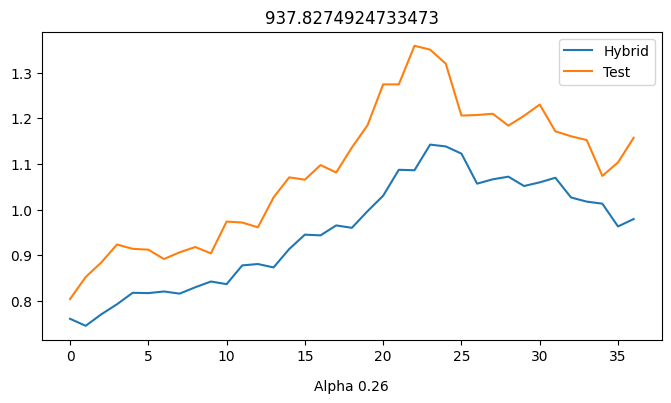

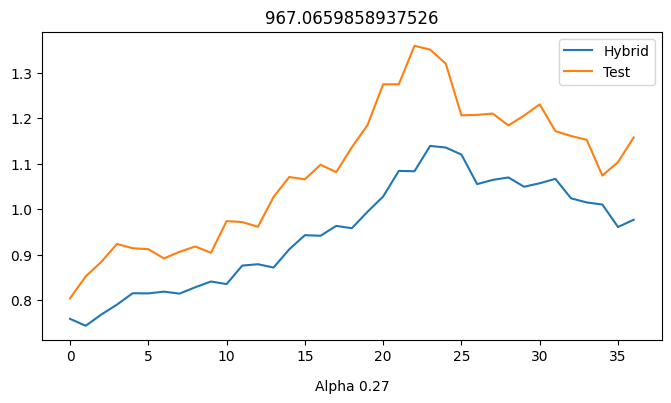

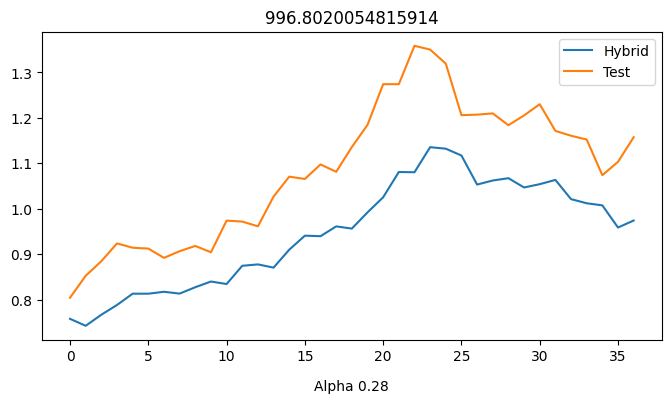

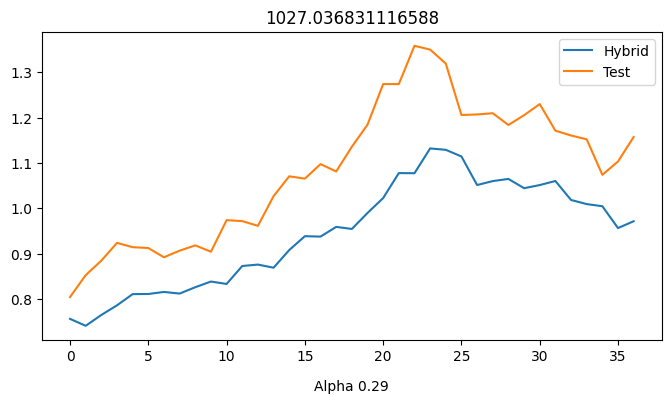

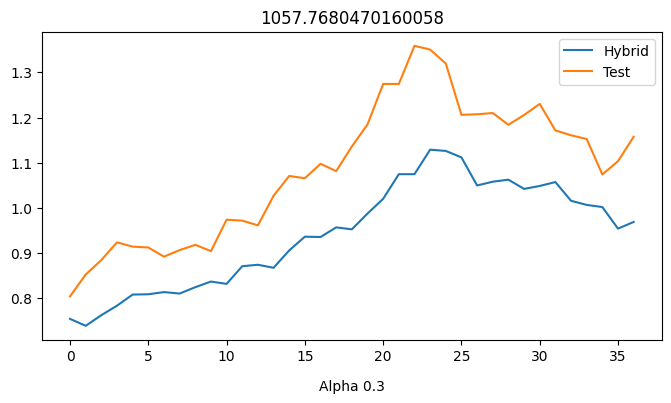

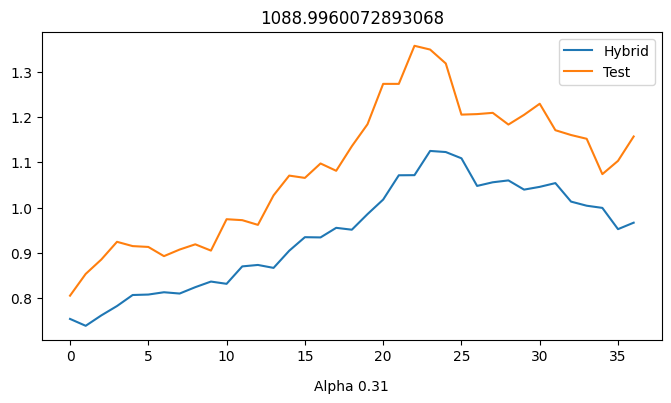

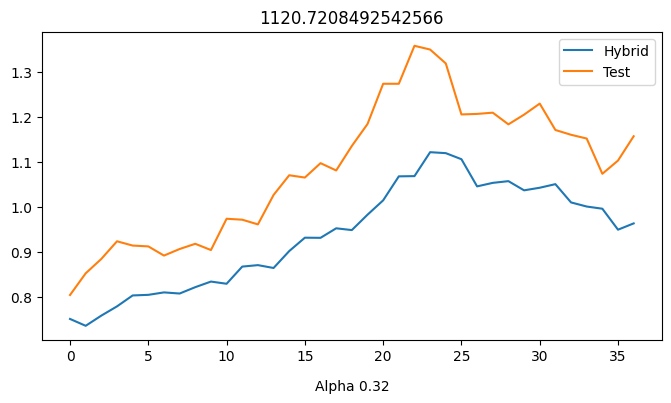

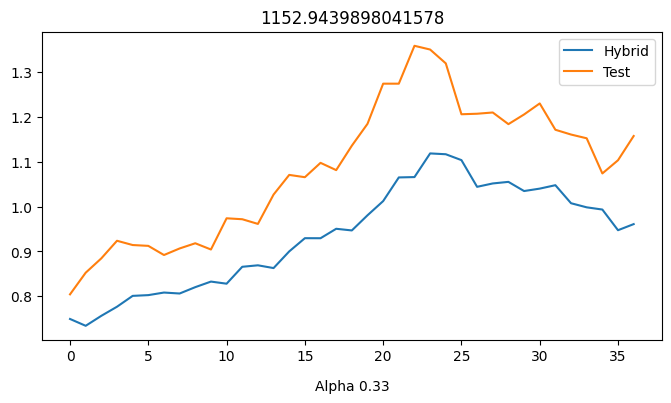

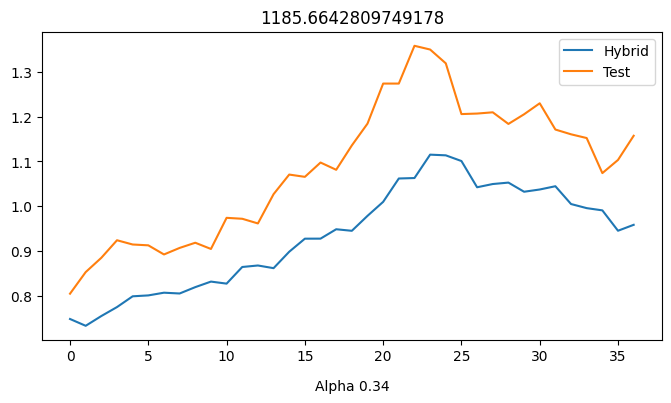

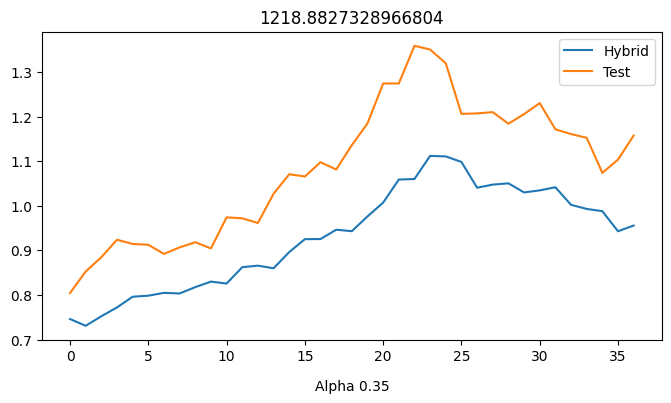

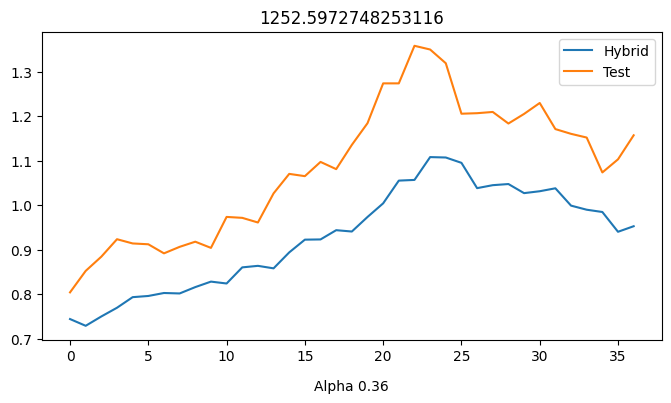

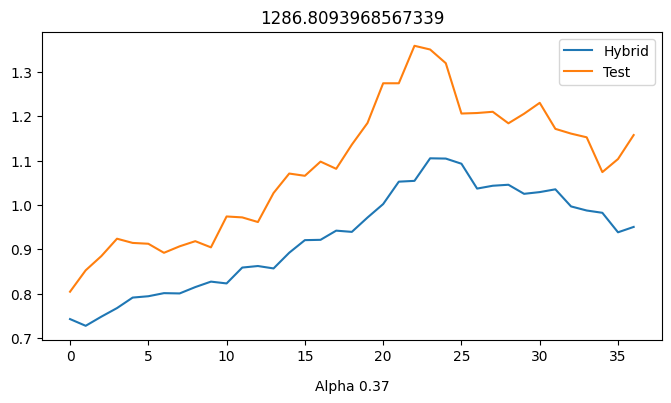

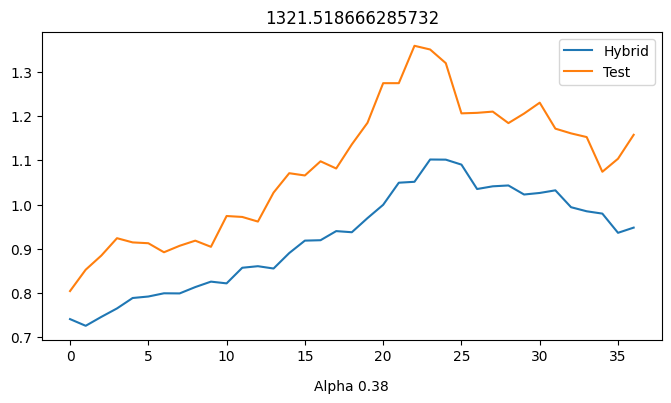

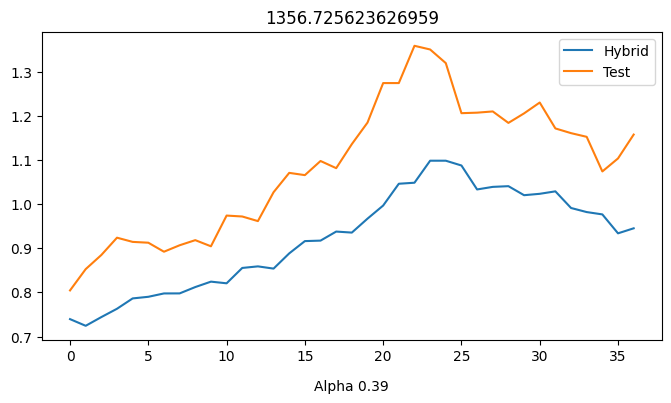

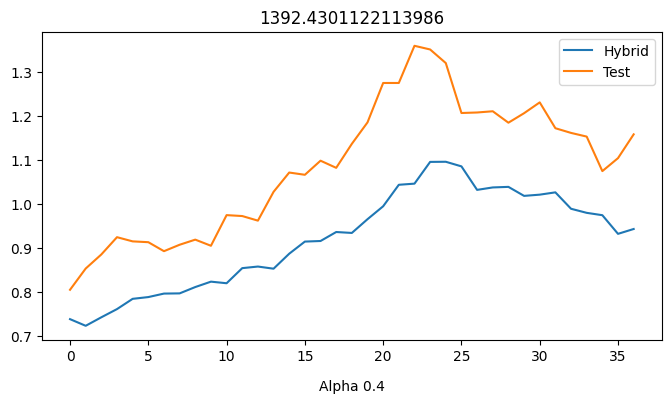

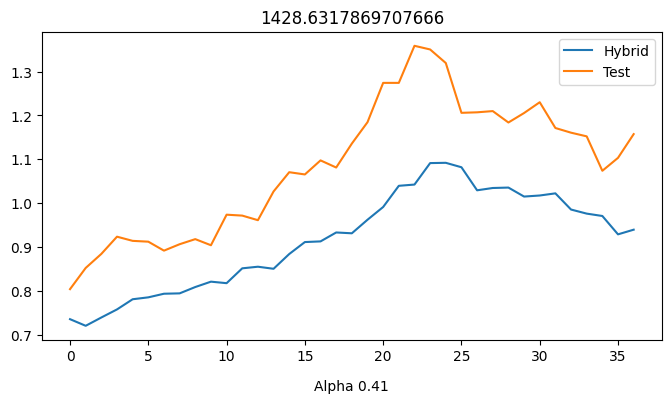

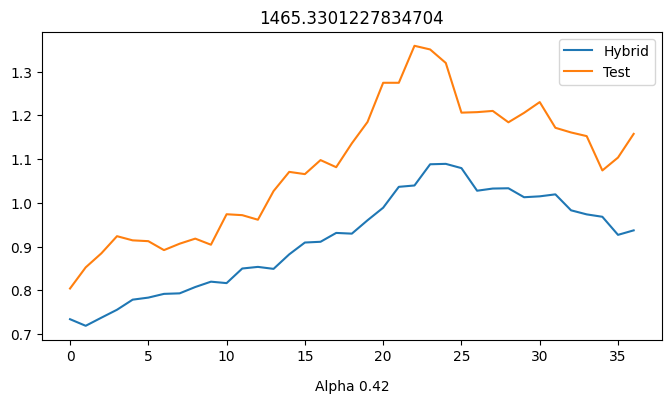

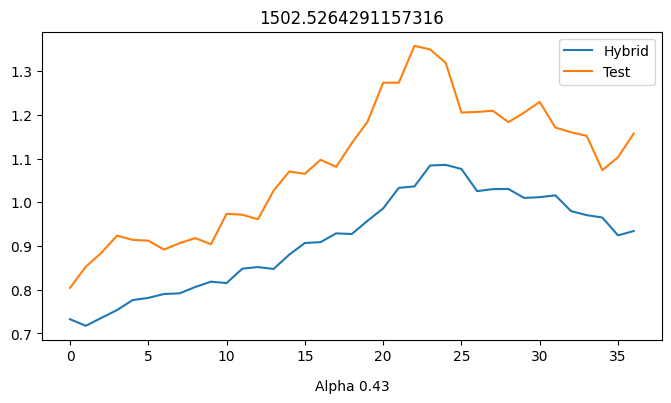

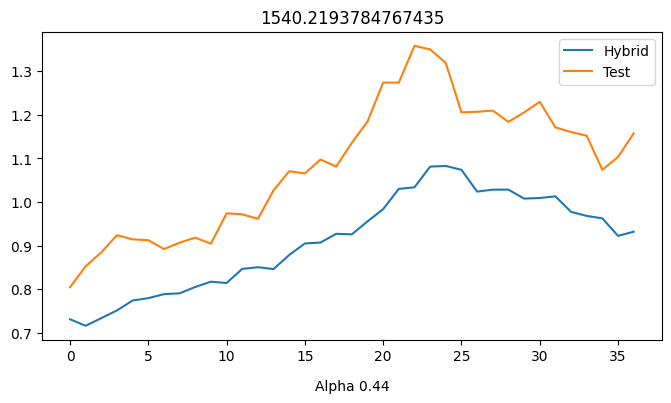

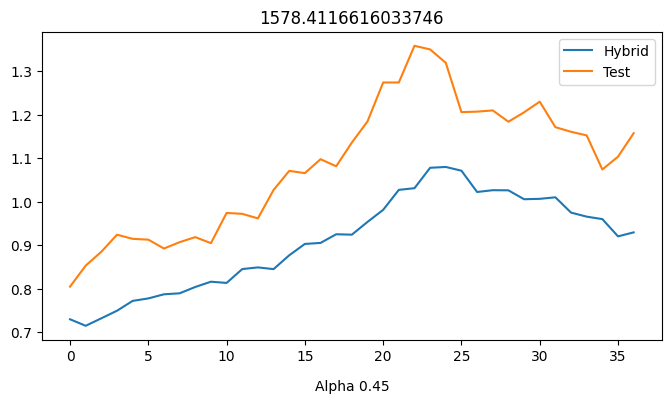

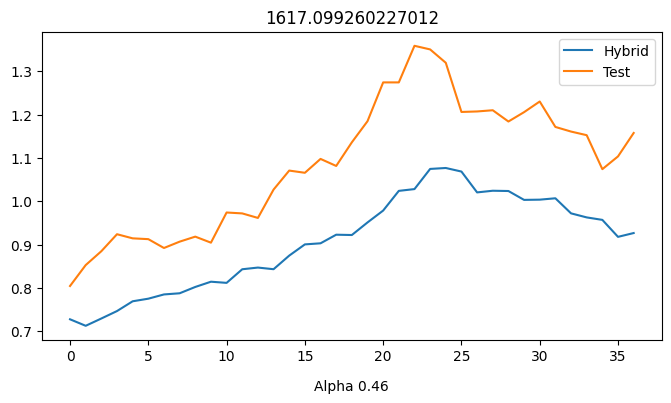

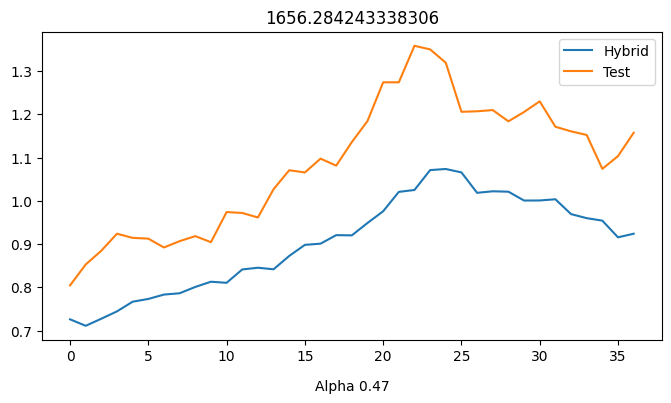

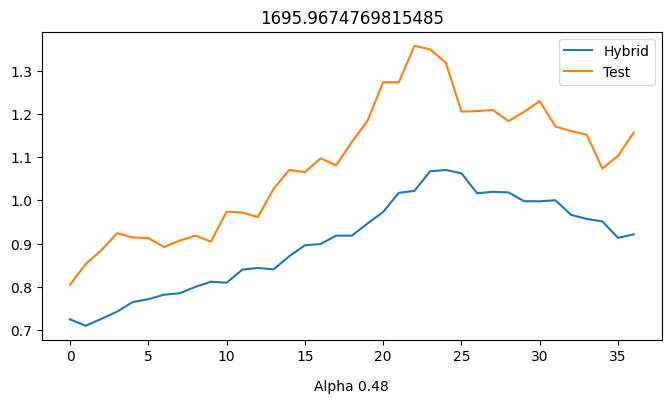

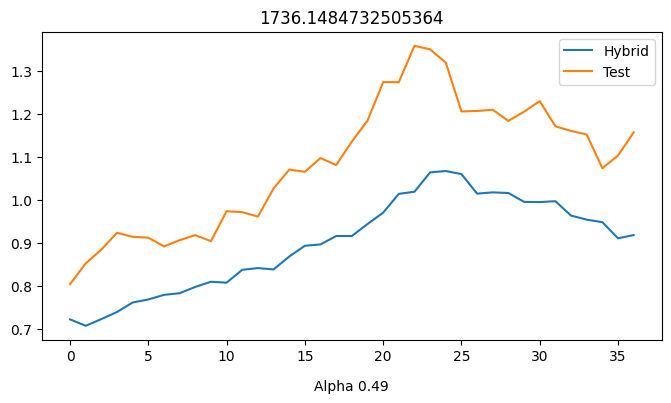

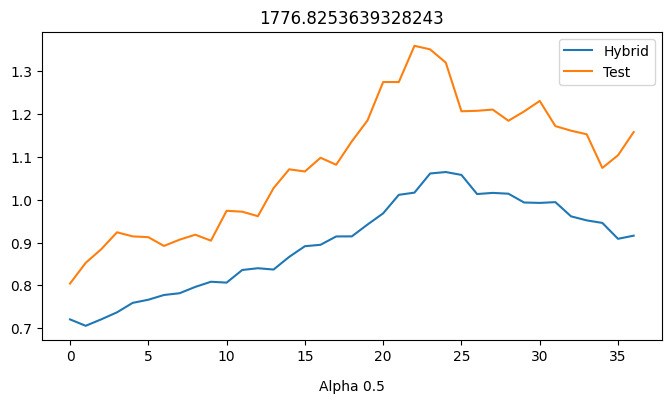

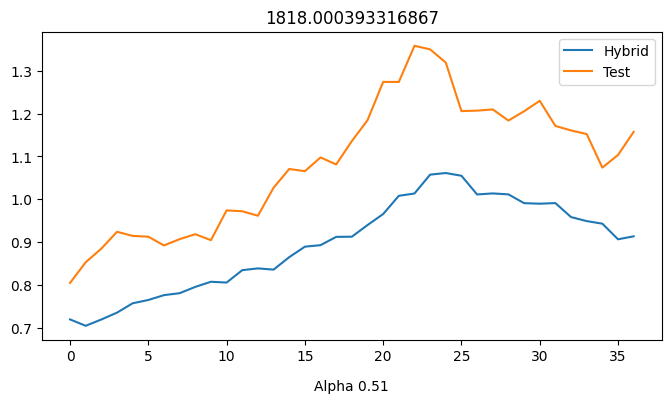

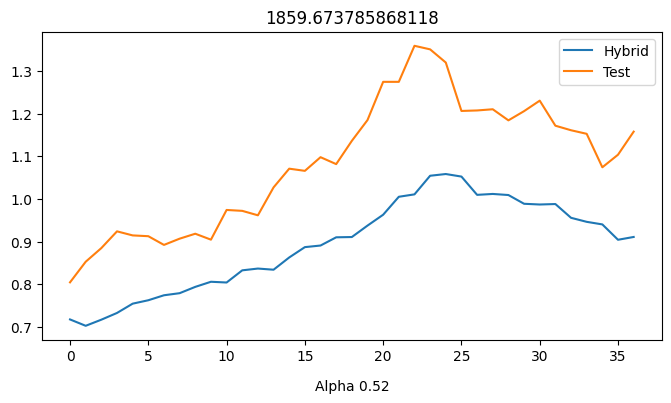

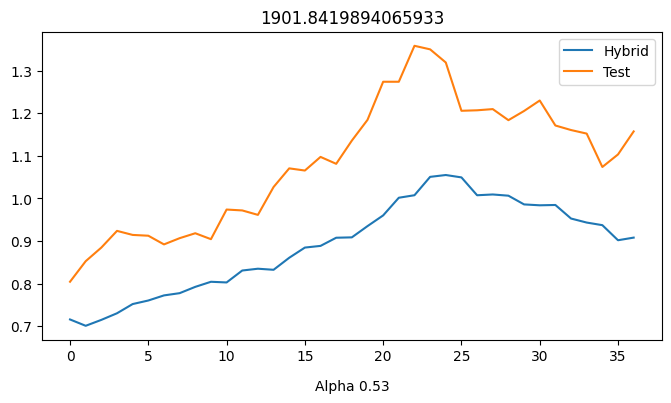

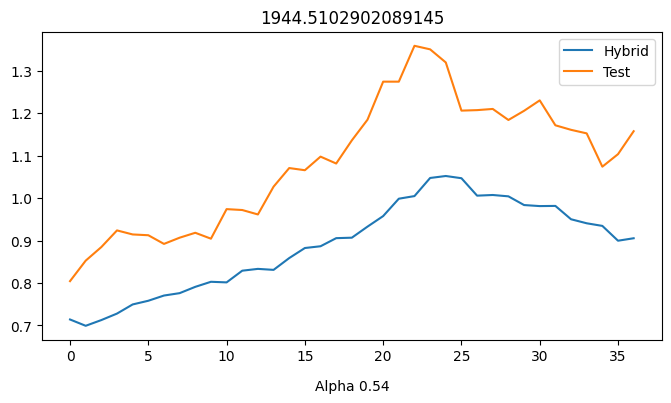

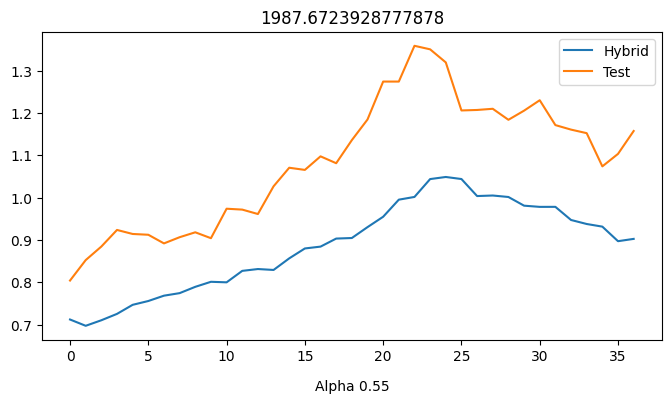

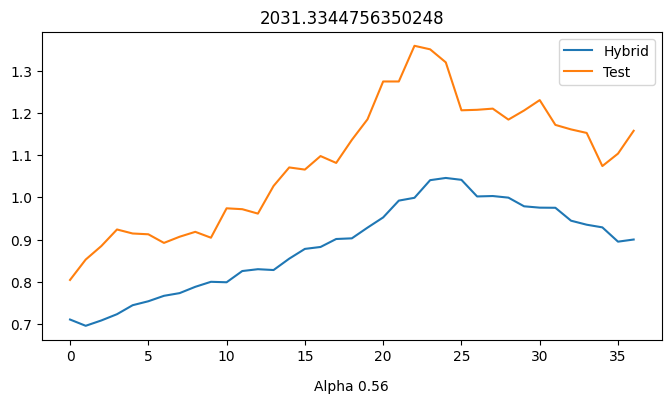

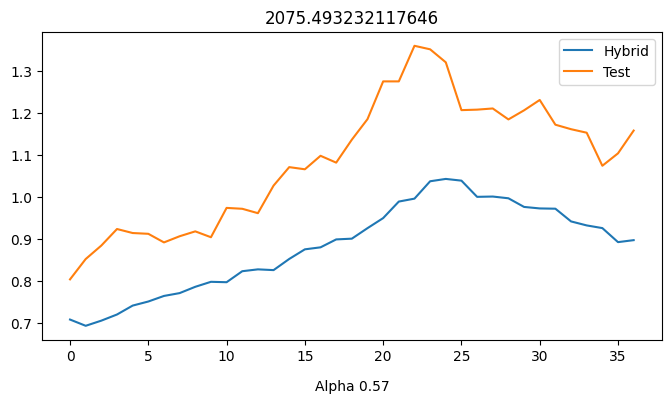

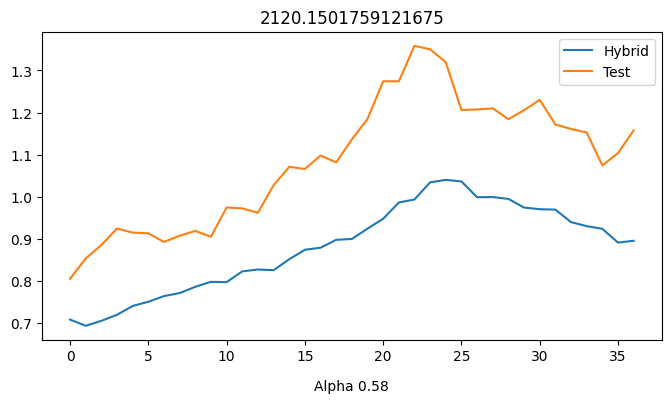

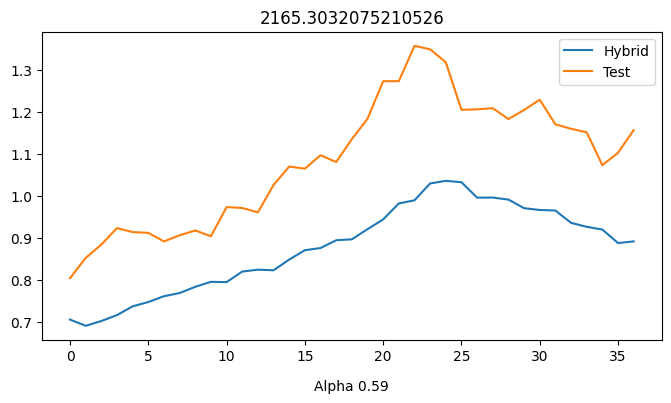

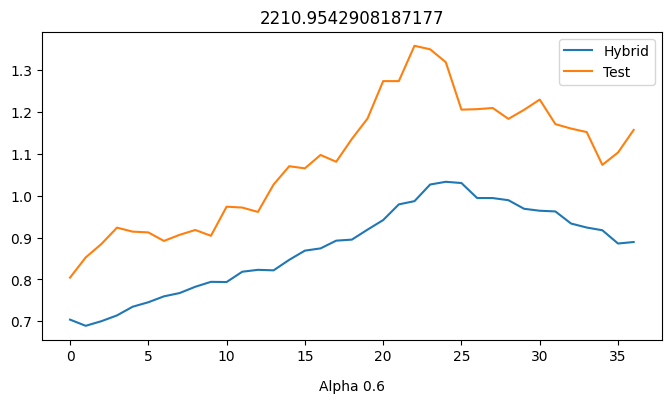

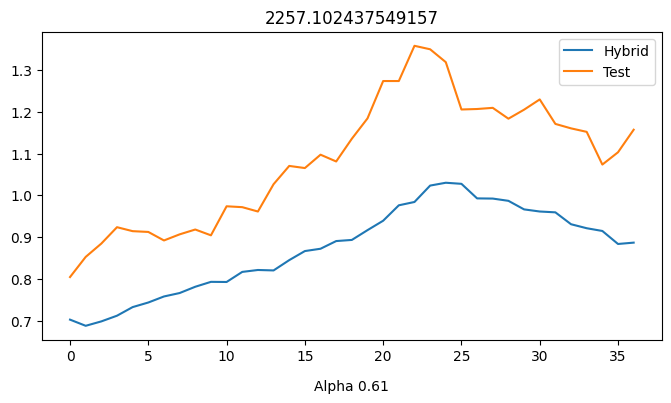

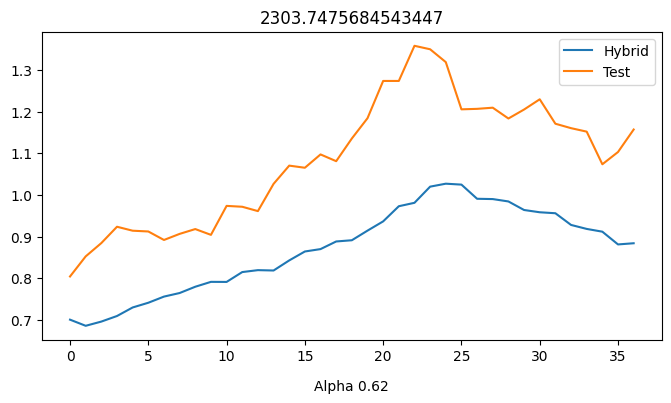

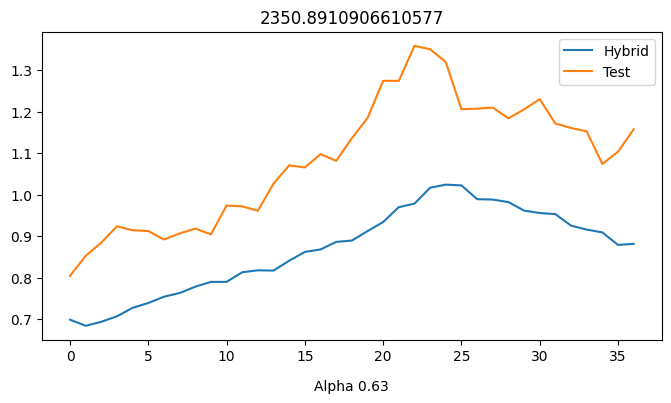

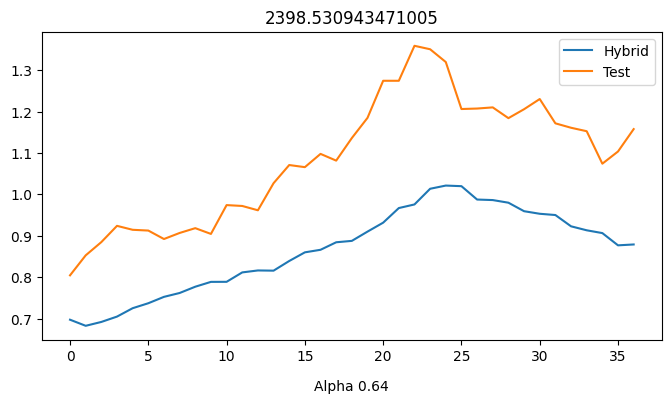

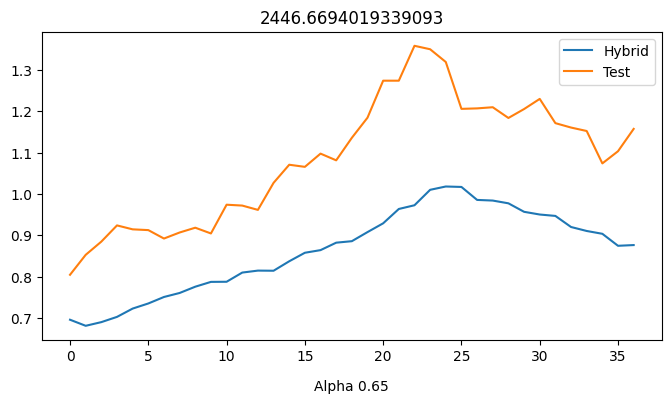

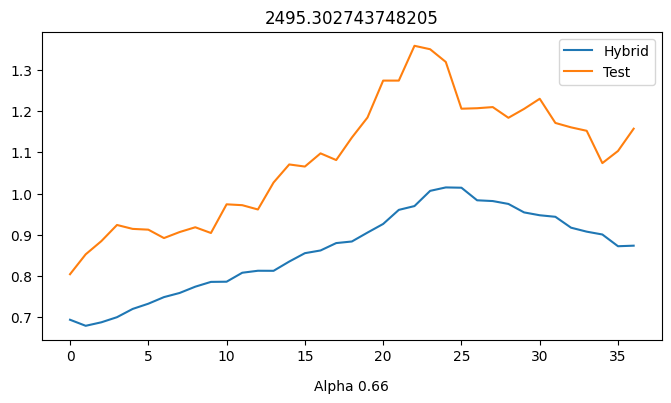

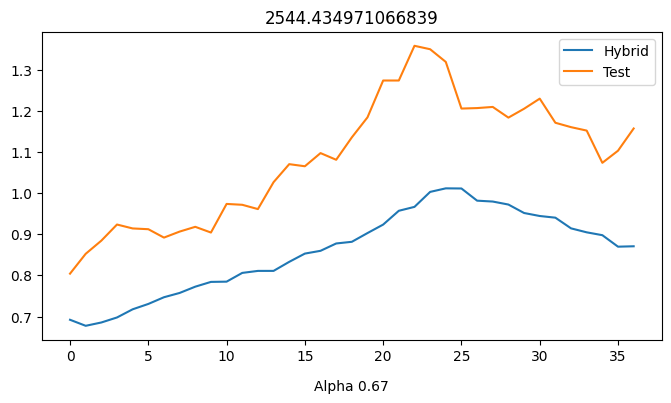

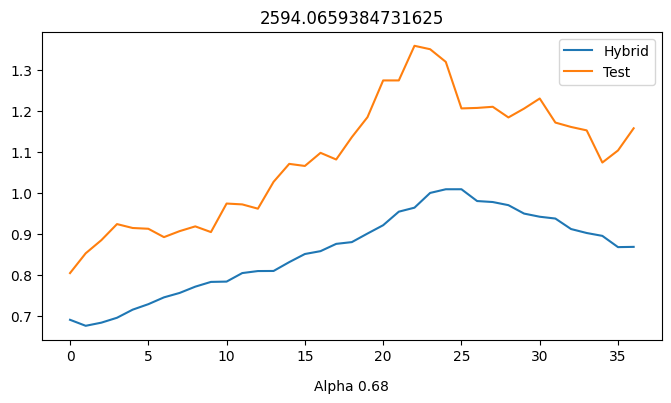

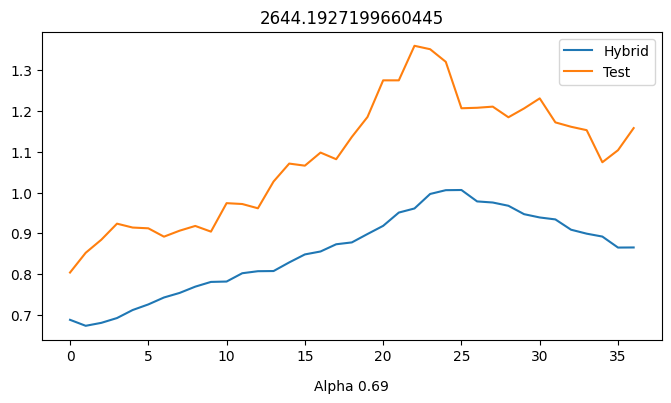

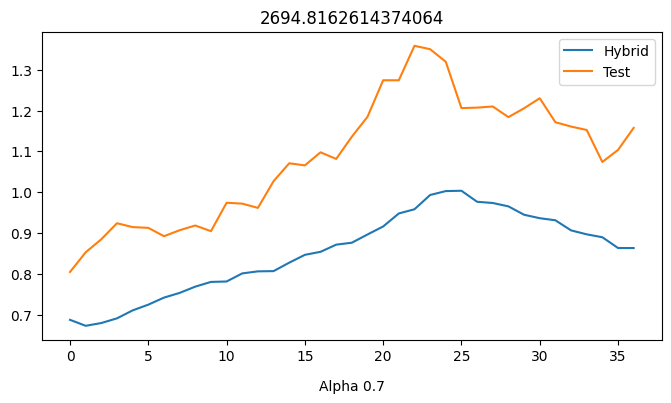

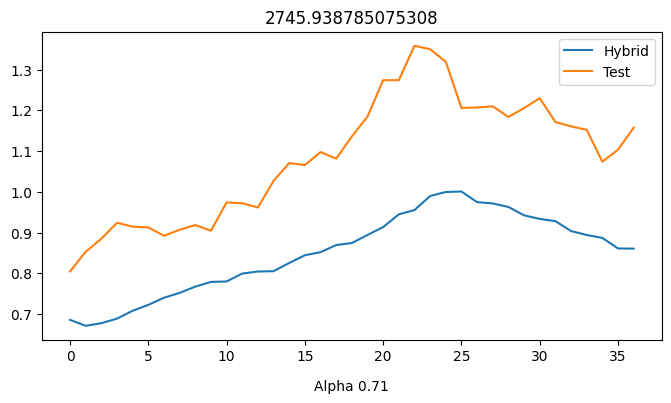

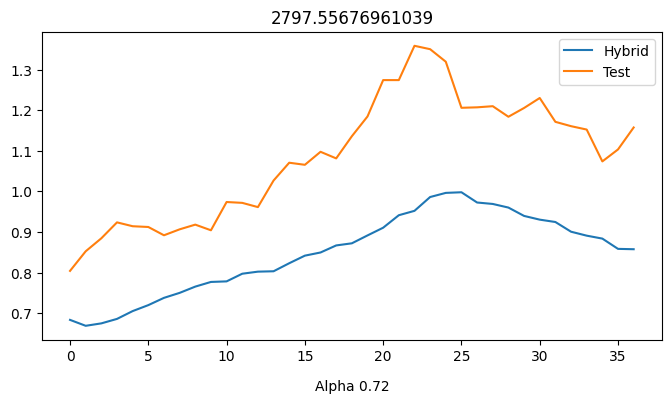

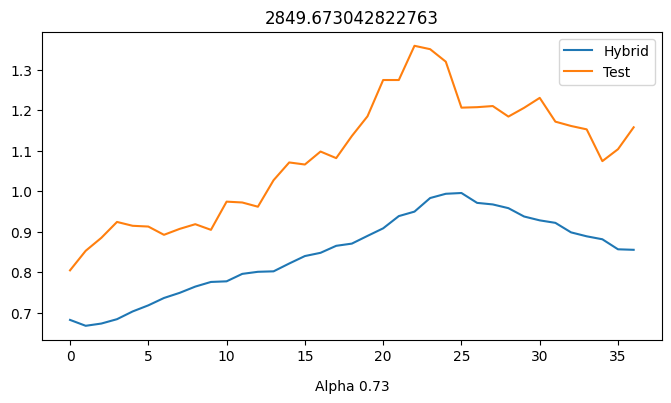

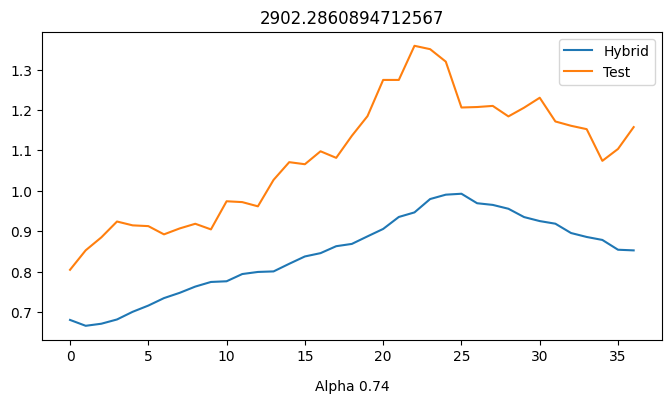

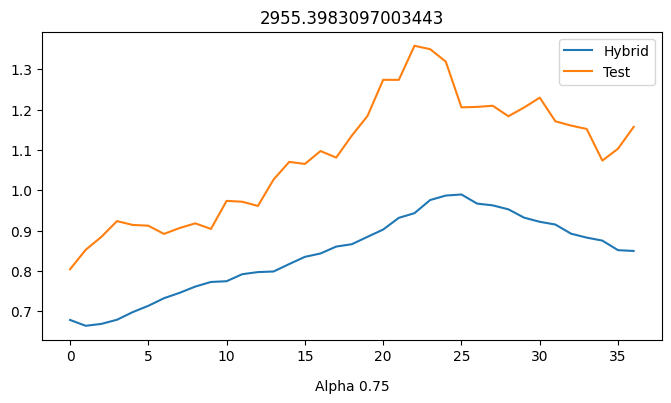

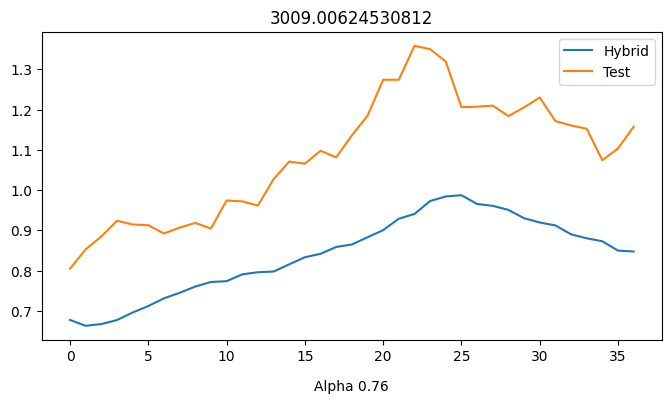

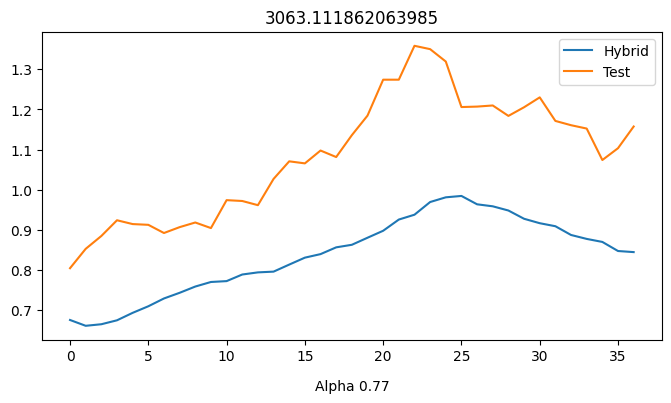

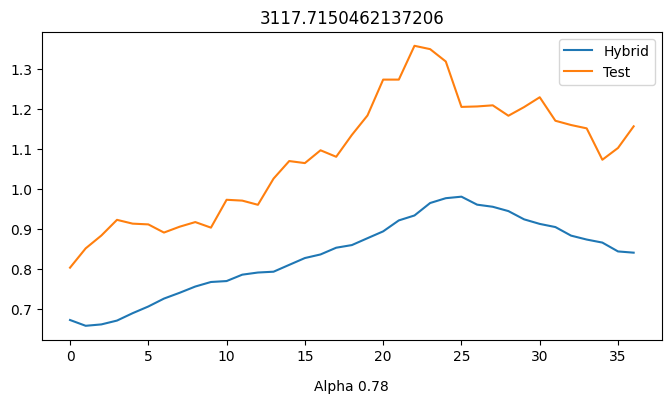

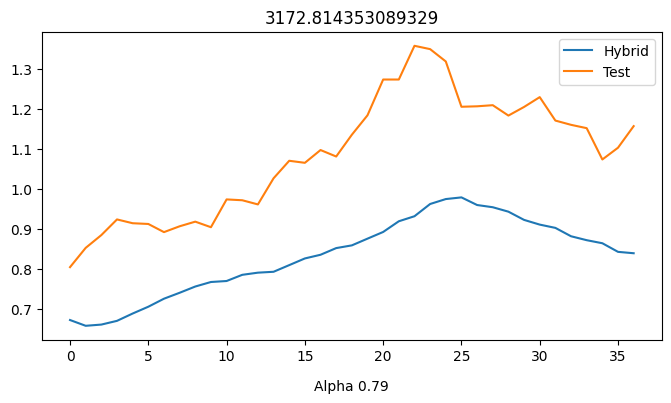

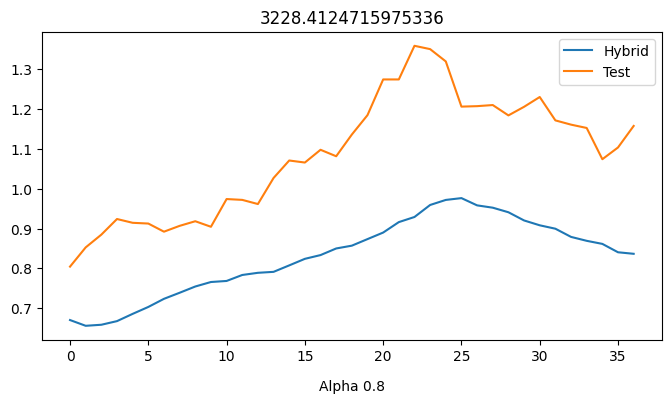

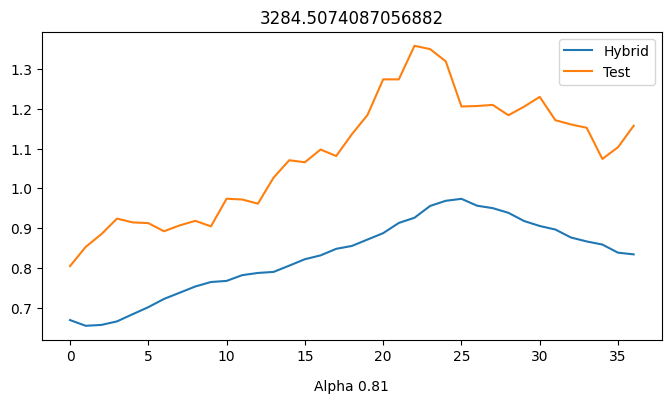

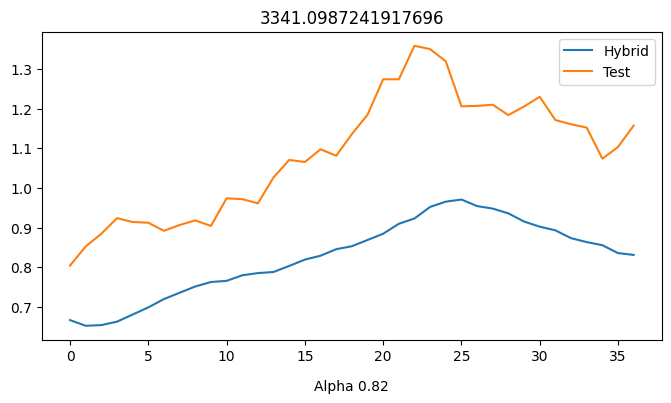

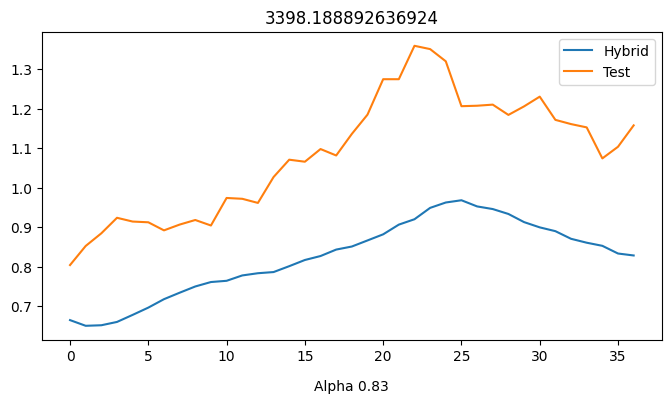

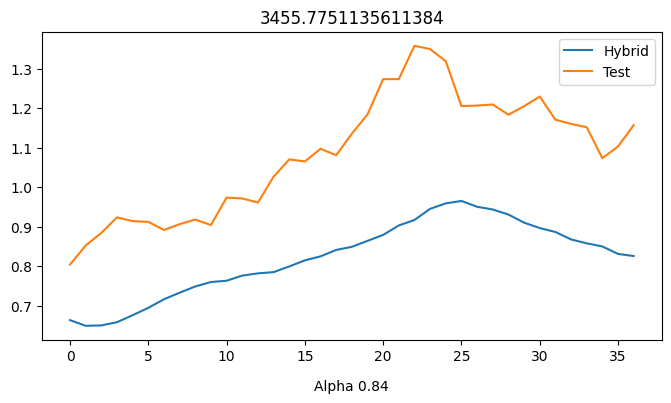

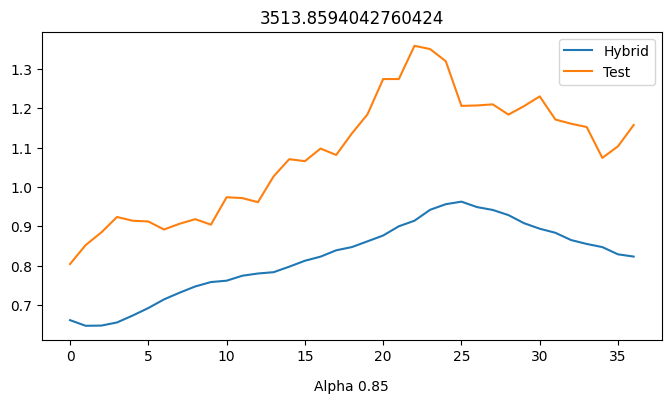

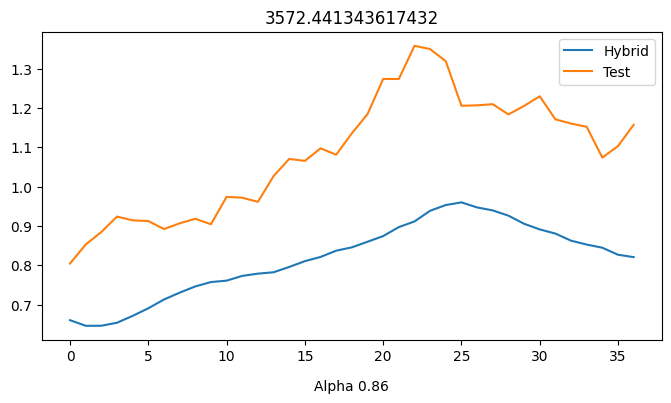

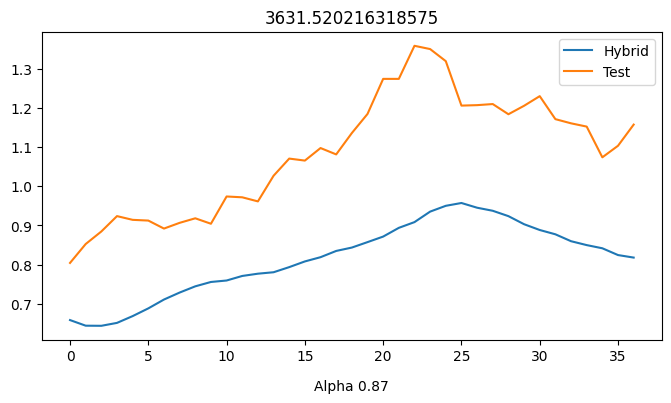

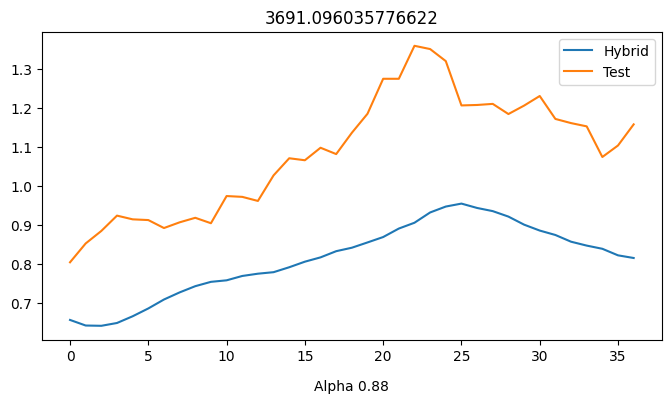

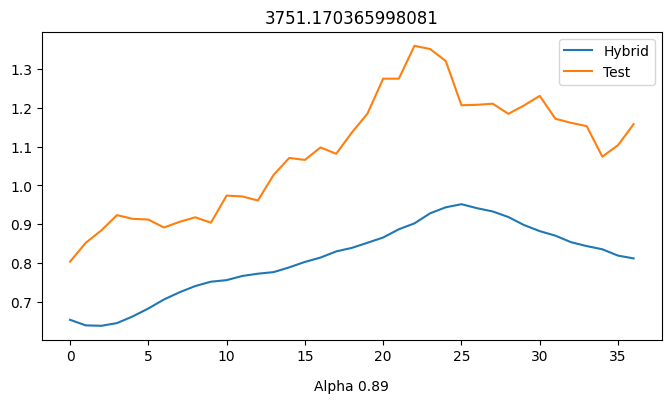

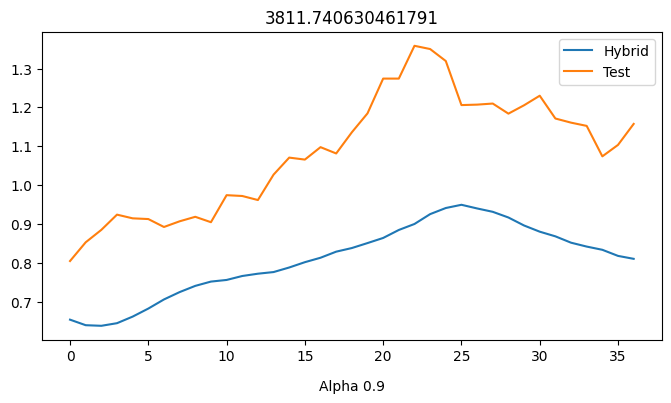

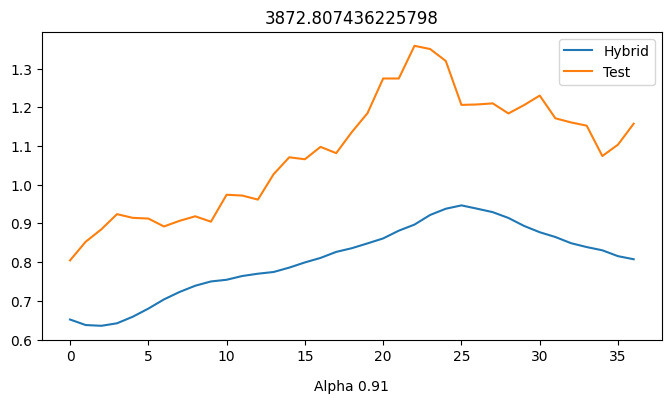

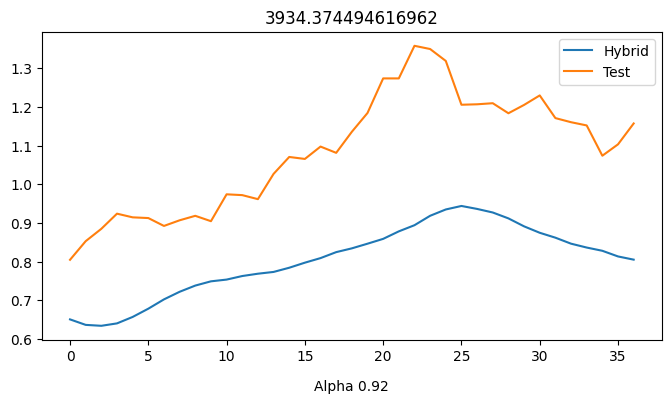

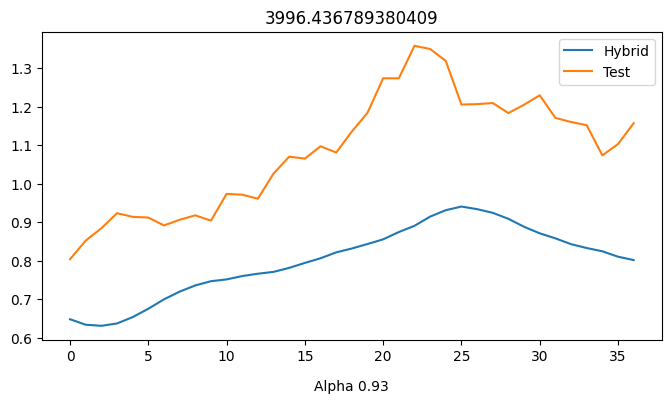

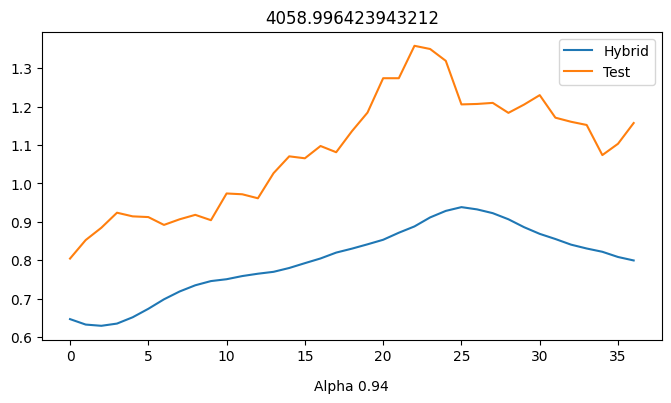

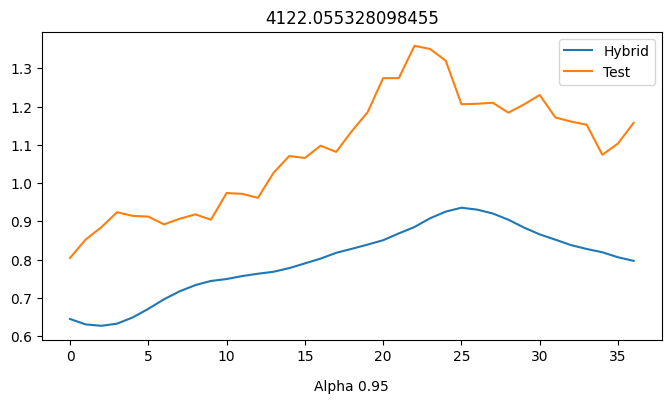

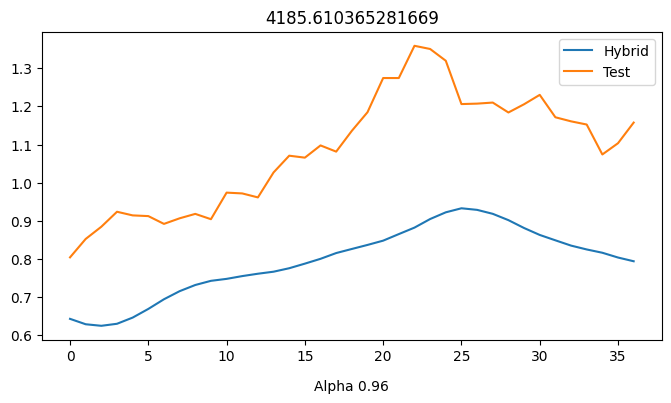

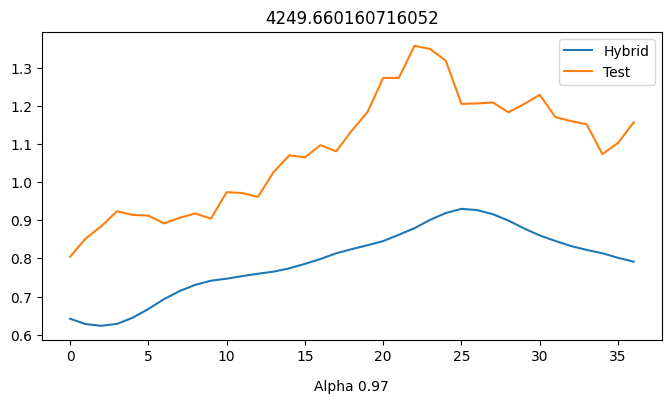

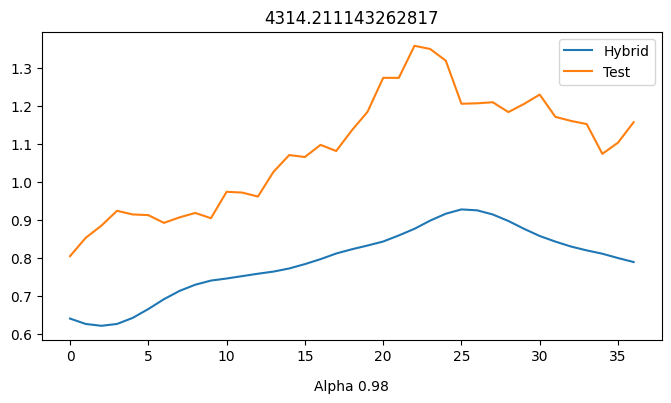

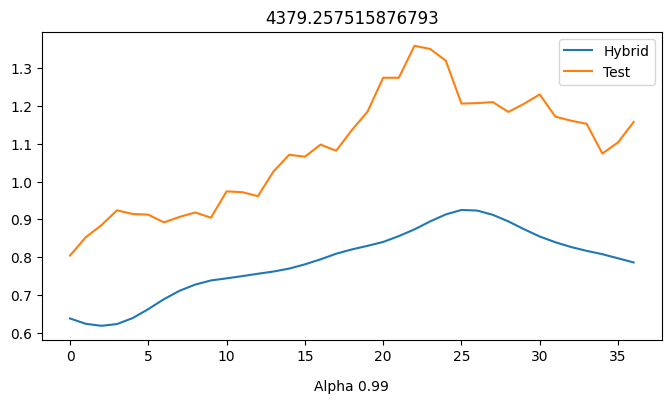

In [ ]:
from sklearn.metrics import mean_squared_error
temp = 99999999
alpha = 0
inverse_Y_test = scaler.inverse_transform(Y_test.reshape(-1,1))
for i in range(1,100):
  fig, ax = plt.subplots(figsize=(8, 4))

  a = i / 100
  hybrid_pred_temp = a * lstm_pred + (1 - a) * gru_pred

  plt.plot(hybrid_pred_temp, label="Hybrid")
  plt.plot(Y_test, label="Test")
  plt.text(0.5, -0.15, f'Alpha {a}', ha='center', va='center', transform=ax.transAxes)

  inverse_Y_pred = scaler.inverse_transform(hybrid_pred_temp)
  mse_temp  = mean_squared_error(inverse_Y_test, inverse_Y_pred)
  if(mse_temp<temp):
    temp = mse_temp
    alpha = a
  plt.title(mse_temp)
  plt.legend()

  plt.show()


In [ ]:
alpha

0.01

In [ ]:
hybrid_pred = alpha * lstm_pred + (1 - alpha) * gru_pred

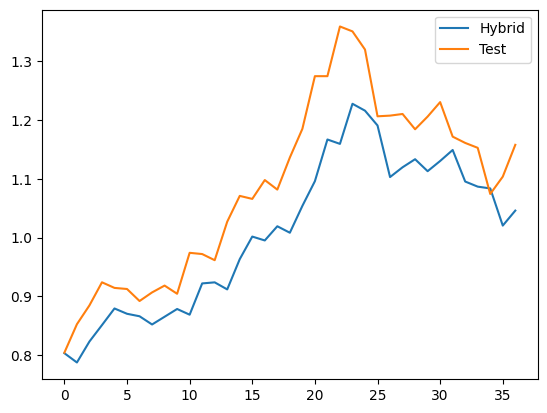

In [ ]:
plt.plot(hybrid_pred,label="Hybrid")
plt.plot(Y_test,label="Test")
plt.legend()
plt.show()

In [ ]:
lstm_pred

array([[0.63659245],
       [0.6224876 ],
       [0.6167694 ],
       [0.62112135],
       [0.63678867],
       [0.66084516],
       [0.68745273],
       [0.71008426],
       [0.72641265],
       [0.7372232 ],
       [0.7429878 ],
       [0.74832994],
       [0.754714  ],
       [0.7607643 ],
       [0.7680616 ],
       [0.77897596],
       [0.7924436 ],
       [0.8071447 ],
       [0.8187519 ],
       [0.8278551 ],
       [0.83778346],
       [0.8527158 ],
       [0.87070256],
       [0.8912596 ],
       [0.91008776],
       [0.92216486],
       [0.92153966],
       [0.91002464],
       [0.8922033 ],
       [0.8715666 ],
       [0.85192627],
       [0.83646023],
       [0.8242848 ],
       [0.81413877],
       [0.80525804],
       [0.79488343],
       [0.783614  ]], dtype=float32)

In [ ]:
hybrid_pred_real = scaler.inverse_transform(hybrid_pred)
y_real = scaler.inverse_transform(Y_test.reshape(-1,1))
hybrid_pred_real,y_real

(array([[ 913.2376 ],
        [ 909.8372 ],
        [ 917.5168 ],
        [ 923.526  ],
        [ 929.61835],
        [ 927.6725 ],
        [ 926.763  ],
        [ 923.7533 ],
        [ 926.58777],
        [ 929.4269 ],
        [ 927.33875],
        [ 938.79083],
        [ 939.18317],
        [ 936.5991 ],
        [ 947.6809 ],
        [ 955.94934],
        [ 954.5306 ],
        [ 959.7269 ],
        [ 957.3557 ],
        [ 967.1832 ],
        [ 976.2386 ],
        [ 991.506  ],
        [ 989.9008 ],
        [1004.5864 ],
        [1002.06433],
        [ 996.6422 ],
        [ 977.74963],
        [ 981.33057],
        [ 984.2845 ],
        [ 979.8986 ],
        [ 983.6375 ],
        [ 987.6646 ],
        [ 976.1092 ],
        [ 974.2396 ],
        [ 973.5826 ],
        [ 959.97253],
        [ 965.4666 ]], dtype=float32),
 array([[ 913.45],
        [ 923.85],
        [ 930.75],
        [ 939.2 ],
        [ 937.15],
        [ 936.75],
        [ 932.35],
        [ 935.5 ],
        [ 938.  ]

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_real, hybrid_pred_real)
mae

16.686834551837

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_real, hybrid_pred_real)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 16.686834551837
MSE: 368.48685622542723
RMSE: 19.196011466589283


In [ ]:
lstm_pred = scaler.inverse_transform(lstm_pred)
mae1 = mean_absolute_error(y_real, lstm_pred)
mse1 = mean_squared_error(y_real, lstm_pred)
rmse1 = np.sqrt(mse1)
print(f"MAE: {mae1}")
print(f"MSE: {mse1}")
print(f"RMSE: {rmse1}")

MAE: 64.52154046135979
MSE: 4444.803336040749
RMSE: 66.6693582993023


In [ ]:
gru_pred = scaler.inverse_transform(gru_pred)
mae1 = mean_absolute_error(y_real, gru_pred)
mse1 = mean_squared_error(y_real, gru_pred)
rmse1 = np.sqrt(mse1)
print(f"MAE: {mae1}")
print(f"MSE: {mse1}")
print(f"RMSE: {rmse1}")

MAE: 16.24344449429899
MSE: 352.17919935329564
RMSE: 18.766438110448547


In [ ]:
lstm_pred_train = lstm.predict(X_train)
gru_pred_train = gru.predict(X_train)


6/6 [==============================] - 0s 28ms/step


In [ ]:
lstm_pred_val = lstm.predict(X_val)
gru_pred_val = gru.predict(X_val)

1/1 [==============================] - 0s 52ms/step


In [ ]:
hybrid_prediction_train = alpha * lstm_pred_train + (1 - alpha) * gru_pred_train
hybrid_prediction_train = scaler.inverse_transform(hybrid_prediction_train)

In [ ]:
hybrid_prediction_val = alpha * lstm_pred_val + (1 - alpha) * gru_pred_val
hybrid_prediction_val = scaler.inverse_transform(hybrid_prediction_val)

In [ ]:
hybrid_prediction_val

array([[918.7021 ],
       [919.00995],
       [917.7369 ],
       [916.92456],
       [920.78436],
       [919.3211 ],
       [917.9614 ],
       [936.45966],
       [943.44824],
       [938.118  ],
       [940.53015],
       [935.4704 ],
       [941.4802 ],
       [942.05096],
       [934.22723],
       [935.89154],
       [932.1982 ],
       [919.0687 ],
       [905.3804 ],
       [911.92035],
       [922.48956]], dtype=float32)

In [ ]:
y_plot = df[target]
y_plot = y_plot[timestamp:]


In [ ]:
indexes = y_plot.index

In [ ]:
indexes

Index(['20-Jan-2023', '23-Jan-2023', '24-Jan-2023', '25-Jan-2023',
       '27-Jan-2023', '30-Jan-2023', '31-Jan-2023', '01-Feb-2023',
       '02-Feb-2023', '03-Feb-2023',
       ...
       '11-Dec-2023', '12-Dec-2023', '13-Dec-2023', '14-Dec-2023',
       '15-Dec-2023', '18-Dec-2023', '19-Dec-2023', '20-Dec-2023',
       '21-Dec-2023', '22-Dec-2023'],
      dtype='object', name='Date ', length=228)

In [ ]:
hybrid_pred_test = hybrid_pred_real.flatten()

In [ ]:
hybrid_prediction_train = hybrid_prediction_train.flatten()
hybrid_prediction_val = hybrid_prediction_val.flatten()

In [ ]:
value = np.concatenate((hybrid_prediction_train,hybrid_prediction_val))
value = np.concatenate((value,hybrid_pred_test))

In [ ]:
value_df = pd.DataFrame(value,index = indexes,columns=["Close"])


In [ ]:
y_df = pd.DataFrame(y_plot)
y_df

close 
Date               
20-Jan-2023  764.45
23-Jan-2023  772.70
24-Jan-2023  775.65
25-Jan-2023  776.50
27-Jan-2023  774.50
...             ...
18-Dec-2023  990.25
19-Dec-2023  988.45
20-Dec-2023  971.55
21-Dec-2023  977.90
22-Dec-2023  989.55

[228 rows x 1 columns]

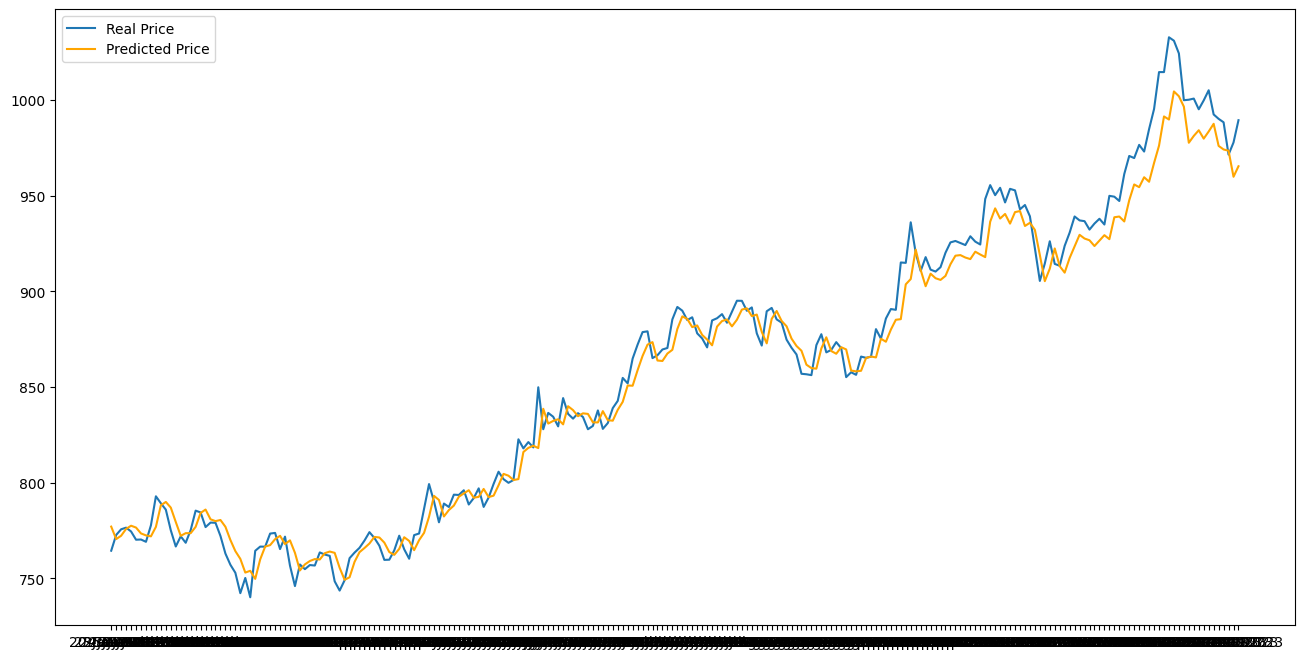

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(y_df.index,y_df['close '],label='Real Price')
plt.plot(value_df, label='Predicted Price',color='orange')
plt.legend()
plt.show()

In [ ]:
new_df = df.reset_index()
new_df = new_df[["Date ","close "]]
new_df = new_df.rename(columns = {"Date ":"ds","close ":"y"})
new_df.head()

ds       y
0  23-Dec-2022  808.65
1  26-Dec-2022  811.00
2  27-Dec-2022  814.80
3  28-Dec-2022  803.80
4  29-Dec-2022  820.75

In [ ]:
import datetime
new_df['ds'] = new_df['ds'].apply(lambda x: datetime.datetime.strptime(x, '%d-%b-%Y').strftime('%Y-%m-%d'))

In [ ]:
from prophet import Prophet
fbp = Prophet(daily_seasonality = True)
fbp.fit(new_df)
fut = fbp.make_future_dataframe(periods=2)
forecast = fbp.predict(fut)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8zynjfwu/xaagrife.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8zynjfwu/06utw7r4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35875', 'data', 'file=/tmp/tmp8zynjfwu/xaagrife.json', 'init=/tmp/tmp8zynjfwu/06utw7r4.json', 'output', 'file=/tmp/tmp8zynjfwu/prophet_model3u1cejgq/prophet_model-20231223074119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(fbp, forecast)

In [ ]:
prophet_model2 = Prophet()

In [ ]:
train = train.reset_index()

In [ ]:
train = train[["Date ","close "]]
train = train.rename(columns = {"Date ":"ds","close ":"y"})

In [ ]:
train.head()

ds       y
0  23-Dec-2022  808.65
1  26-Dec-2022  811.00
2  27-Dec-2022  814.80
3  28-Dec-2022  803.80
4  29-Dec-2022  820.75

In [ ]:
train['ds'] = train['ds'].apply(lambda x: datetime.datetime.strptime(x, '%d-%b-%Y').strftime('%Y-%m-%d'))

In [ ]:
new_test = test[20:]

In [ ]:
prophet_model2.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8zynjfwu/91b7vxa5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8zynjfwu/gmclv9af.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35894', 'data', 'file=/tmp/tmp8zynjfwu/91b7vxa5.json', 'init=/tmp/tmp8zynjfwu/gmclv9af.json', 'output', 'file=/tmp/tmp8zynjfwu/prophet_modeljxmotfs6/prophet_model-20231223074119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = prophet_model2.make_future_dataframe(periods=len(new_test))
prophet_predictions = prophet_model2.predict(future)

In [ ]:
prophet_predictions.head()

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2022-12-23  809.782129  794.497167  828.001954   809.782129   809.782129   
1 2022-12-26  806.458736  792.023645  823.137300   806.458736   806.458736   
2 2022-12-27  805.350938  789.566276  821.054750   805.350938   805.350938   
3 2022-12-28  804.243141  788.047667  820.471340   804.243141   804.243141   
4 2022-12-29  803.135343  786.534531  819.740369   803.135343   803.135343   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0        2.168512              2.168512              2.168512  2.168512   
1        0.657233              0.657233              0.657233  0.657233   
2       -0.123341             -0.123341             -0.123341 -0.123341   
3        0.490865              0.490865              0.490865  0.490865   
4       -0.167764             -0.167764             -0.167764 -0.167764   

   weekly_lower  weekly_upper  multiplicative_terms  \
0      2.168512      2.168512                   0.0   
1      0.657233      0.657233                   0.0   
2     -0.123341     -0.123341                   0.0   
3      0.490865      0.490865                   0.0   
4     -0.167764     -0.167764                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper        yhat  
0                         0.0                         0.0  811.950641  
1                         0.0                         0.0  807.115969  
2                         0.0                         0.0  805.227597  
3                         0.0                         0.0  804.734006  
4                         0.0                         0.0  802.967579

In [ ]:
test_real = df.iloc[:,6:7]
test_pred = prophet_predictions['yhat']

In [ ]:
test_real = test_real['close ']

In [ ]:
mse_prophet = mean_squared_error(test_real,test_pred)
mse_prophet

220.6488404843116

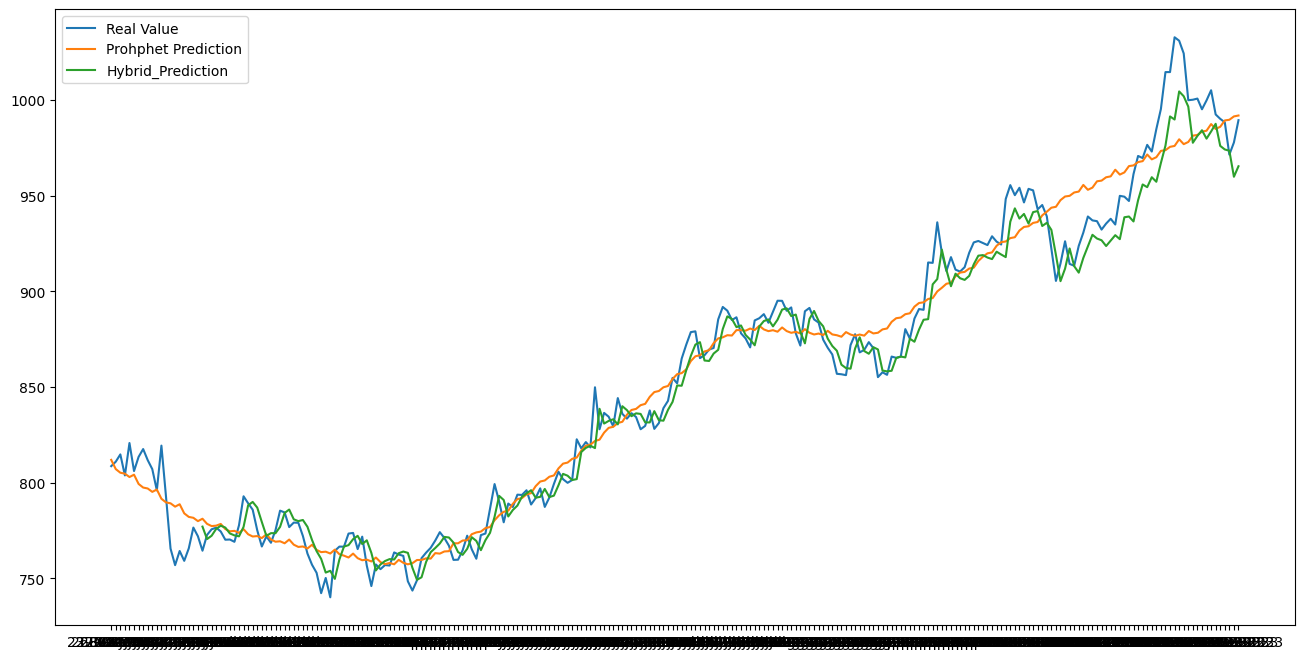

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(test_real, label = "Real Value")
plt.plot(test_pred, label="Prohphet Prediction")
plt.plot(value_df['Close'], label = "Hybrid_Prediction")
plt.legend()
plt.show()

In [ ]:
import joblib

In [ ]:
joblib.dump(lstm_model, 'lstm_model.joblib')
joblib.dump(gru_model, 'gru_model.joblib')

['gru_model.joblib']

In [ ]:
joblib.dump(prophet_model2, 'prophet_model.joblib')

['prophet_model.joblib']